<a href="https://colab.research.google.com/github/ericbanzuzi/Thesis-DL-LC/blob/main/notebooks/MC4_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive', force_remount=True)
base = Path('/content/drive/MyDrive/thesis')  # working directory 

Mounted at /content/drive


Get the git repo to colab through a zip file to get faster performance

In [2]:
zip_path = base/'Thesis-DL-LC-main.zip'
!cp '{zip_path}' .
!unzip -q Thesis-DL-LC-main.zip
!rm Thesis-DL-LC-main.zip

In [3]:
%cd '/content/Thesis-DL-LC-main'

/content/Thesis-DL-LC-main


In [4]:
# imports
!pip install av  # needed for video reading using pytorchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
from models.models import MC4
from models.helper_functions import VideoFolderCustom, train, find_classes, eval_model, plot_training_path
from torchvision import transforms as t
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, RocCurveDisplay
import torch.nn as nn
from torch.utils.data import DataLoader

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 150
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 13.5 MB/s eta 0:00:00


In [5]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
# setup transformer for the clips
transforms = [t.Resize((112,112), antialias=None)]
transformer = t.Compose(transforms)

## **BASELINE: Recognition**

These experiments are for the lane change recognition task. Here we look at how the model performs on the baseline dataset and how the size of the region of interest affects the performances. All the models are evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the following:
- Train set size: 897
- Test set size: 299
- Adam optimizer with a learning rate 1e-3
- Epochs: 40
- Batch size: 16

### **ROI 2:**

In [20]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True)

test_dir = './datasets/test/Recognition/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 897
Test data: 299


In [21]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'MC4_ROI2_recognition_baseline')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = MC4(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 57/57 [03:31<00:00,  3.70s/it, acc=0.447, loss=1.24]


Epoch: 1 | train_loss: 1.2442 | train_acc: 0.4474 | test_loss: 1.3637 | test_acc: 0.4112


Epoch [2/40]: 100%|██████████| 57/57 [03:19<00:00,  3.49s/it, acc=0.488, loss=1.03]


Epoch: 2 | train_loss: 1.0305 | train_acc: 0.4879 | test_loss: 1.0754 | test_acc: 0.4357


Epoch [3/40]: 100%|██████████| 57/57 [03:19<00:00,  3.50s/it, acc=0.51, loss=1.01]


Epoch: 3 | train_loss: 1.0124 | train_acc: 0.5099 | test_loss: 1.0713 | test_acc: 0.4205


Epoch [4/40]: 100%|██████████| 57/57 [03:19<00:00,  3.51s/it, acc=0.514, loss=0.983]


Epoch: 4 | train_loss: 0.9835 | train_acc: 0.5143 | test_loss: 1.3233 | test_acc: 0.4671


Epoch [5/40]: 100%|██████████| 57/57 [03:17<00:00,  3.47s/it, acc=0.522, loss=0.985]


Epoch: 5 | train_loss: 0.9847 | train_acc: 0.5219 | test_loss: 1.1650 | test_acc: 0.3849


Epoch [6/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.522, loss=0.988]


Epoch: 6 | train_loss: 0.9881 | train_acc: 0.5219 | test_loss: 1.0087 | test_acc: 0.4611


Epoch [7/40]: 100%|██████████| 57/57 [03:18<00:00,  3.48s/it, acc=0.542, loss=0.955]


Epoch: 7 | train_loss: 0.9548 | train_acc: 0.5417 | test_loss: 0.9785 | test_acc: 0.4958


Epoch [8/40]: 100%|██████████| 57/57 [03:18<00:00,  3.48s/it, acc=0.533, loss=0.945]


Epoch: 8 | train_loss: 0.9450 | train_acc: 0.5329 | test_loss: 1.0072 | test_acc: 0.4563


Epoch [9/40]: 100%|██████████| 57/57 [03:18<00:00,  3.49s/it, acc=0.555, loss=0.935]


Epoch: 9 | train_loss: 0.9347 | train_acc: 0.5548 | test_loss: 1.1903 | test_acc: 0.4079


Epoch [10/40]: 100%|██████████| 57/57 [03:17<00:00,  3.47s/it, acc=0.548, loss=0.927]


Epoch: 10 | train_loss: 0.9274 | train_acc: 0.5482 | test_loss: 0.9795 | test_acc: 0.5398


Epoch [11/40]: 100%|██████████| 57/57 [03:17<00:00,  3.47s/it, acc=0.56, loss=0.922]


Epoch: 11 | train_loss: 0.9225 | train_acc: 0.5603 | test_loss: 1.2531 | test_acc: 0.4028


Epoch [12/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.582, loss=0.9]


Epoch: 12 | train_loss: 0.9001 | train_acc: 0.5822 | test_loss: 1.0090 | test_acc: 0.5269


Epoch [13/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.583, loss=0.887]


Epoch: 13 | train_loss: 0.8868 | train_acc: 0.5833 | test_loss: 0.9158 | test_acc: 0.5846


Epoch [14/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.6, loss=0.852]


Epoch: 14 | train_loss: 0.8522 | train_acc: 0.5998 | test_loss: 1.0281 | test_acc: 0.5467


Epoch [15/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.579, loss=0.888]


Epoch: 15 | train_loss: 0.8883 | train_acc: 0.5789 | test_loss: 1.3500 | test_acc: 0.4486


Epoch [16/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.595, loss=0.869]


Epoch: 16 | train_loss: 0.8690 | train_acc: 0.5954 | test_loss: 1.1993 | test_acc: 0.4405


Epoch [17/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.6, loss=0.874]


Epoch: 17 | train_loss: 0.8739 | train_acc: 0.5998 | test_loss: 0.9899 | test_acc: 0.5467


Epoch [18/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.59, loss=0.877]


Epoch: 18 | train_loss: 0.8771 | train_acc: 0.5899 | test_loss: 1.0393 | test_acc: 0.5553


Epoch [19/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.629, loss=0.818]


Epoch: 19 | train_loss: 0.8178 | train_acc: 0.6294 | test_loss: 0.9058 | test_acc: 0.5682


Epoch [20/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.604, loss=0.823]


Epoch: 20 | train_loss: 0.8229 | train_acc: 0.6042 | test_loss: 1.0509 | test_acc: 0.5876


Epoch [21/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.655, loss=0.781]


Epoch: 21 | train_loss: 0.7811 | train_acc: 0.6546 | test_loss: 1.2422 | test_acc: 0.5221


Epoch [22/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.669, loss=0.719]


Epoch: 22 | train_loss: 0.7192 | train_acc: 0.6689 | test_loss: 0.8774 | test_acc: 0.6417


Epoch [23/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.697, loss=0.691]


Epoch: 23 | train_loss: 0.6910 | train_acc: 0.6974 | test_loss: 1.2892 | test_acc: 0.5144


Epoch [24/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.708, loss=0.662]


Epoch: 24 | train_loss: 0.6624 | train_acc: 0.7083 | test_loss: 0.7187 | test_acc: 0.7093


Epoch [25/40]: 100%|██████████| 57/57 [03:21<00:00,  3.53s/it, acc=0.747, loss=0.599]


Epoch: 25 | train_loss: 0.5990 | train_acc: 0.7467 | test_loss: 0.7295 | test_acc: 0.6995


Epoch [26/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.759, loss=0.597]


Epoch: 26 | train_loss: 0.5966 | train_acc: 0.7588 | test_loss: 1.0475 | test_acc: 0.6062


Epoch [27/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.763, loss=0.544]


Epoch: 27 | train_loss: 0.5442 | train_acc: 0.7632 | test_loss: 1.9948 | test_acc: 0.4704


Epoch [28/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.797, loss=0.496]


Epoch: 28 | train_loss: 0.4957 | train_acc: 0.7971 | test_loss: 0.9138 | test_acc: 0.6648


Epoch [29/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.803, loss=0.492]


Epoch: 29 | train_loss: 0.4916 | train_acc: 0.8026 | test_loss: 1.2410 | test_acc: 0.5664


Epoch [30/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.815, loss=0.456]


Epoch: 30 | train_loss: 0.4564 | train_acc: 0.8147 | test_loss: 1.0840 | test_acc: 0.6154


Epoch [31/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.816, loss=0.414]


Epoch: 31 | train_loss: 0.4136 | train_acc: 0.8158 | test_loss: 1.2085 | test_acc: 0.6094


Epoch [32/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.838, loss=0.401]


Epoch: 32 | train_loss: 0.4015 | train_acc: 0.8377 | test_loss: 1.0701 | test_acc: 0.6666


Epoch [33/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.864, loss=0.334]


Epoch: 33 | train_loss: 0.3339 | train_acc: 0.8640 | test_loss: 1.3251 | test_acc: 0.6465


Epoch [34/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.851, loss=0.369]


Epoch: 34 | train_loss: 0.3690 | train_acc: 0.8509 | test_loss: 1.8026 | test_acc: 0.5538


Epoch [35/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.876, loss=0.292]


Epoch: 35 | train_loss: 0.2920 | train_acc: 0.8761 | test_loss: 1.0359 | test_acc: 0.6702


Epoch [36/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.919, loss=0.224]


Epoch: 36 | train_loss: 0.2239 | train_acc: 0.9189 | test_loss: 1.0028 | test_acc: 0.6531


Epoch [37/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.925, loss=0.201]


Epoch: 37 | train_loss: 0.2007 | train_acc: 0.9254 | test_loss: 1.1666 | test_acc: 0.6830


Epoch [38/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.934, loss=0.206]


Epoch: 38 | train_loss: 0.2056 | train_acc: 0.9342 | test_loss: 0.9818 | test_acc: 0.7189


Epoch [39/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.922, loss=0.201]


Epoch: 39 | train_loss: 0.2010 | train_acc: 0.9221 | test_loss: 0.7545 | test_acc: 0.7554


Epoch [40/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.925, loss=0.203]


Epoch: 40 | train_loss: 0.2027 | train_acc: 0.9254 | test_loss: 0.9589 | test_acc: 0.7485
Total training time: 9097.675 seconds


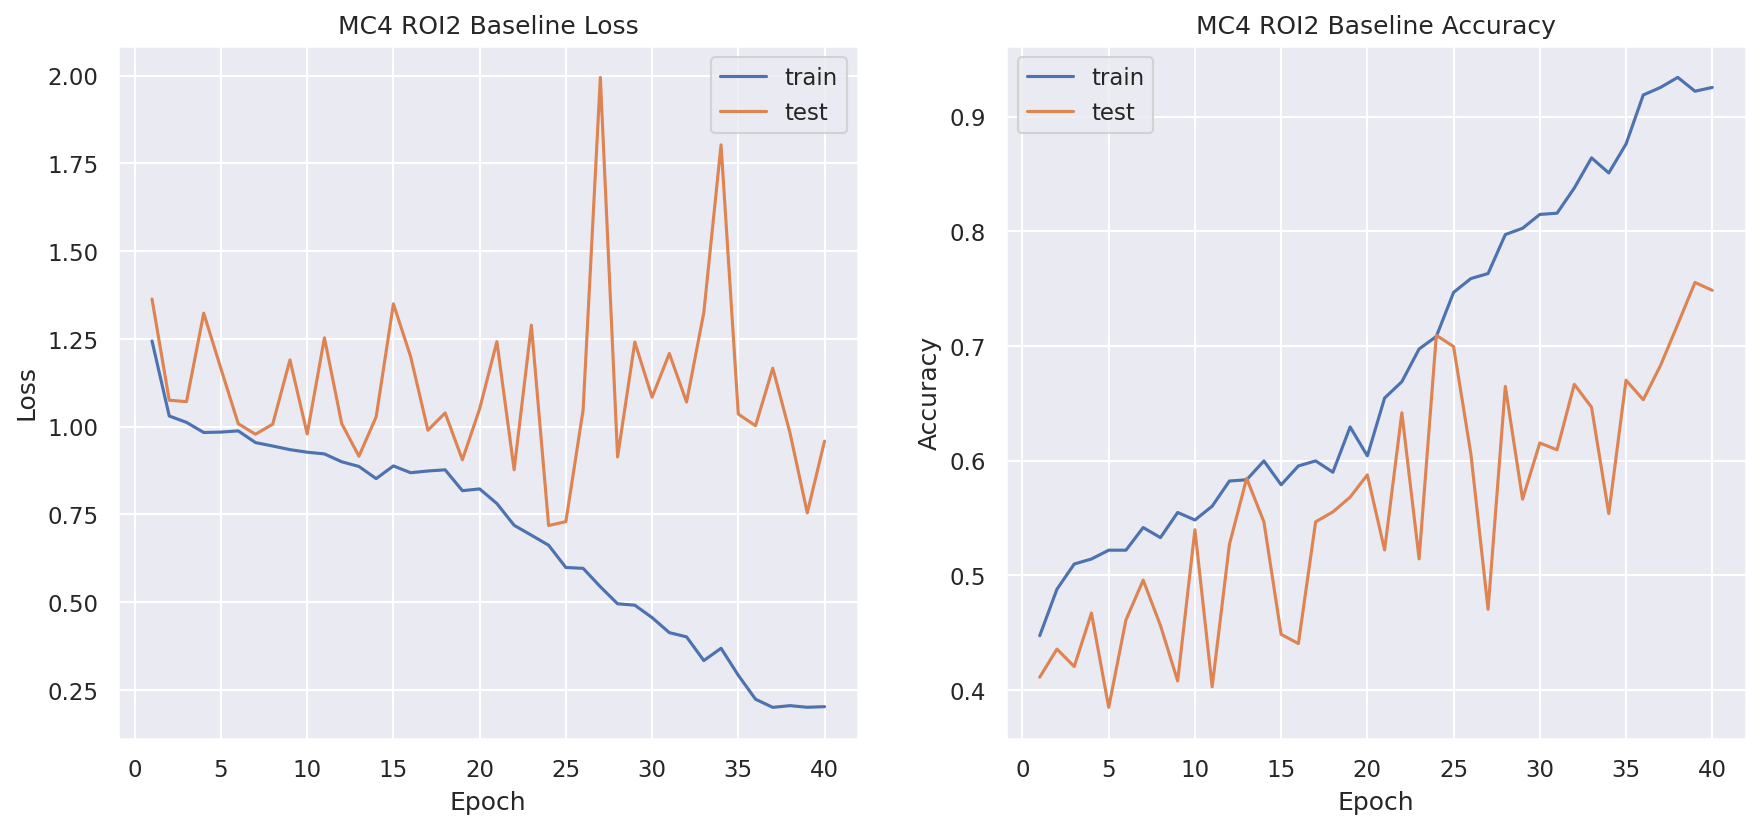

In [22]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'MC4 ROI2 Baseline')

In [23]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = MC4(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.7558528428093646
Precision: 0.7632360632055475
Recall: 0.756140350877193


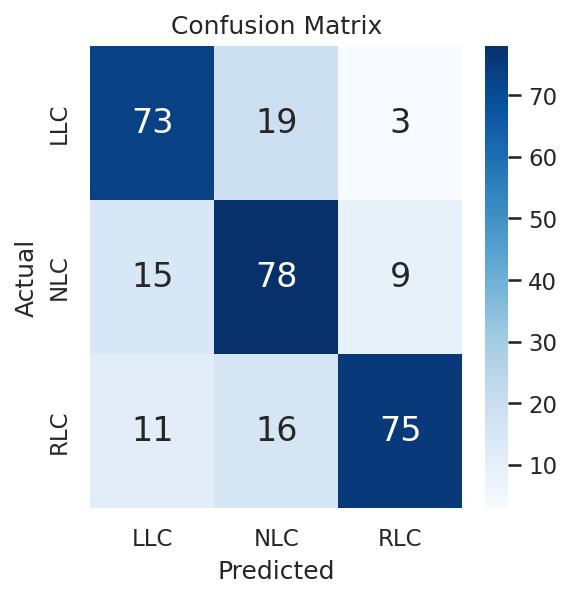

In [24]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

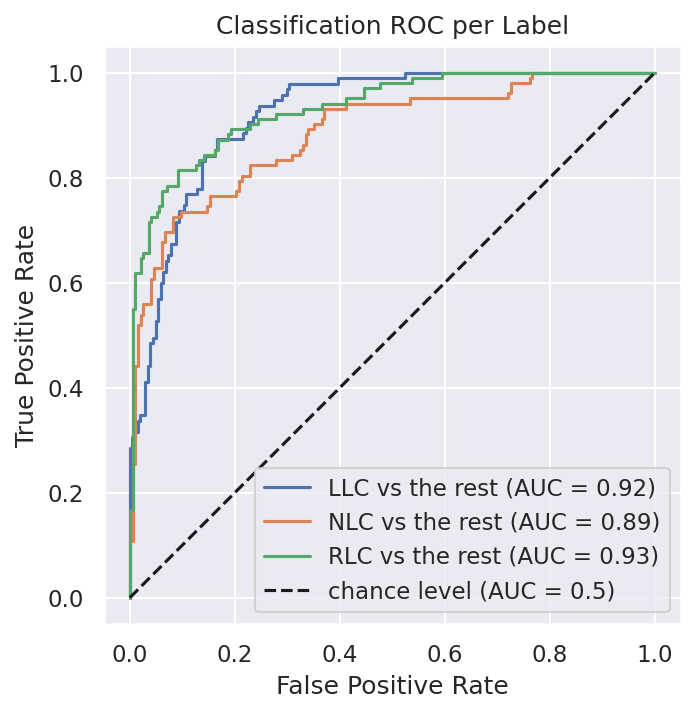

In [25]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

### **ROI 3:**

In [26]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 3'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True)

test_dir = './datasets/test/Recognition/ROI 3'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [27]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'MC4_ROI3_recognition_baseline')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = MC4(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 57/57 [03:17<00:00,  3.47s/it, acc=0.411, loss=1.25]


Epoch: 1 | train_loss: 1.2493 | train_acc: 0.4112 | test_loss: 3.5207 | test_acc: 0.2961


Epoch [2/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.491, loss=1.06]


Epoch: 2 | train_loss: 1.0628 | train_acc: 0.4912 | test_loss: 1.1047 | test_acc: 0.4803


Epoch [3/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.475, loss=1.04]


Epoch: 3 | train_loss: 1.0406 | train_acc: 0.4748 | test_loss: 3.3072 | test_acc: 0.3867


Epoch [4/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.492, loss=1.02]


Epoch: 4 | train_loss: 1.0188 | train_acc: 0.4923 | test_loss: 1.1628 | test_acc: 0.4390


Epoch [5/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.543, loss=0.972]


Epoch: 5 | train_loss: 0.9718 | train_acc: 0.5428 | test_loss: 1.0205 | test_acc: 0.4668


Epoch [6/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.501, loss=0.995]


Epoch: 6 | train_loss: 0.9947 | train_acc: 0.5011 | test_loss: 1.1077 | test_acc: 0.4620


Epoch [7/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.52, loss=0.952]


Epoch: 7 | train_loss: 0.9519 | train_acc: 0.5197 | test_loss: 2.5225 | test_acc: 0.3618


Epoch [8/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.544, loss=0.941]


Epoch: 8 | train_loss: 0.9408 | train_acc: 0.5439 | test_loss: 1.0352 | test_acc: 0.4456


Epoch [9/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.545, loss=0.936]


Epoch: 9 | train_loss: 0.9360 | train_acc: 0.5450 | test_loss: 1.0282 | test_acc: 0.4913


Epoch [10/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.575, loss=0.929]


Epoch: 10 | train_loss: 0.9291 | train_acc: 0.5746 | test_loss: 1.1886 | test_acc: 0.5045


Epoch [11/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.565, loss=0.907]


Epoch: 11 | train_loss: 0.9068 | train_acc: 0.5647 | test_loss: 1.3180 | test_acc: 0.4815


Epoch [12/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.583, loss=0.884]


Epoch: 12 | train_loss: 0.8841 | train_acc: 0.5833 | test_loss: 1.2605 | test_acc: 0.4719


Epoch [13/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.583, loss=0.89]


Epoch: 13 | train_loss: 0.8899 | train_acc: 0.5833 | test_loss: 1.6249 | test_acc: 0.3487


Epoch [14/40]: 100%|██████████| 57/57 [03:19<00:00,  3.51s/it, acc=0.601, loss=0.89]


Epoch: 14 | train_loss: 0.8900 | train_acc: 0.6009 | test_loss: 1.0311 | test_acc: 0.4862


Epoch [15/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.606, loss=0.864]


Epoch: 15 | train_loss: 0.8640 | train_acc: 0.6064 | test_loss: 1.1314 | test_acc: 0.4303


Epoch [16/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.568, loss=0.86]


Epoch: 16 | train_loss: 0.8605 | train_acc: 0.5680 | test_loss: 1.3821 | test_acc: 0.4818


Epoch [17/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.605, loss=0.867]


Epoch: 17 | train_loss: 0.8670 | train_acc: 0.6053 | test_loss: 0.9122 | test_acc: 0.5748


Epoch [18/40]: 100%|██████████| 57/57 [03:18<00:00,  3.49s/it, acc=0.601, loss=0.833]


Epoch: 18 | train_loss: 0.8328 | train_acc: 0.6009 | test_loss: 1.0590 | test_acc: 0.5030


Epoch [19/40]: 100%|██████████| 57/57 [03:19<00:00,  3.51s/it, acc=0.625, loss=0.814]


Epoch: 19 | train_loss: 0.8144 | train_acc: 0.6250 | test_loss: 1.2448 | test_acc: 0.4982


Epoch [20/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.654, loss=0.81]


Epoch: 20 | train_loss: 0.8102 | train_acc: 0.6535 | test_loss: 1.1554 | test_acc: 0.4913


Epoch [21/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.628, loss=0.811]


Epoch: 21 | train_loss: 0.8108 | train_acc: 0.6283 | test_loss: 0.8923 | test_acc: 0.6094


Epoch [22/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.617, loss=0.835]


Epoch: 22 | train_loss: 0.8352 | train_acc: 0.6173 | test_loss: 0.9439 | test_acc: 0.5440


Epoch [23/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.692, loss=0.721]


Epoch: 23 | train_loss: 0.7206 | train_acc: 0.6919 | test_loss: 1.2690 | test_acc: 0.5260


Epoch [24/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.677, loss=0.75]


Epoch: 24 | train_loss: 0.7499 | train_acc: 0.6765 | test_loss: 1.0773 | test_acc: 0.5371


Epoch [25/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.707, loss=0.675]


Epoch: 25 | train_loss: 0.6747 | train_acc: 0.7072 | test_loss: 0.9456 | test_acc: 0.6029


Epoch [26/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.694, loss=0.665]


Epoch: 26 | train_loss: 0.6652 | train_acc: 0.6941 | test_loss: 0.8887 | test_acc: 0.6157


Epoch [27/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.697, loss=0.677]


Epoch: 27 | train_loss: 0.6774 | train_acc: 0.6974 | test_loss: 0.7791 | test_acc: 0.6734


Epoch [28/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.735, loss=0.639]


Epoch: 28 | train_loss: 0.6393 | train_acc: 0.7346 | test_loss: 1.1450 | test_acc: 0.5772


Epoch [29/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.758, loss=0.585]


Epoch: 29 | train_loss: 0.5851 | train_acc: 0.7577 | test_loss: 1.3539 | test_acc: 0.5383


Epoch [30/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.762, loss=0.59]


Epoch: 30 | train_loss: 0.5905 | train_acc: 0.7621 | test_loss: 0.8916 | test_acc: 0.6657


Epoch [31/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.796, loss=0.515]


Epoch: 31 | train_loss: 0.5154 | train_acc: 0.7961 | test_loss: 0.8468 | test_acc: 0.7016


Epoch [32/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.819, loss=0.463]


Epoch: 32 | train_loss: 0.4635 | train_acc: 0.8191 | test_loss: 0.7990 | test_acc: 0.7150


Epoch [33/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.8, loss=0.475]


Epoch: 33 | train_loss: 0.4750 | train_acc: 0.8004 | test_loss: 0.8204 | test_acc: 0.7075


Epoch [34/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.812, loss=0.441]


Epoch: 34 | train_loss: 0.4412 | train_acc: 0.8125 | test_loss: 0.8404 | test_acc: 0.6983


Epoch [35/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.872, loss=0.348]


Epoch: 35 | train_loss: 0.3485 | train_acc: 0.8717 | test_loss: 1.4826 | test_acc: 0.5520


Epoch [36/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.842, loss=0.377]


Epoch: 36 | train_loss: 0.3768 | train_acc: 0.8421 | test_loss: 2.5130 | test_acc: 0.4211


Epoch [37/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.844, loss=0.349]


Epoch: 37 | train_loss: 0.3493 | train_acc: 0.8443 | test_loss: 1.9038 | test_acc: 0.4883


Epoch [38/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.883, loss=0.299]


Epoch: 38 | train_loss: 0.2992 | train_acc: 0.8827 | test_loss: 2.4784 | test_acc: 0.4255


Epoch [39/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.886, loss=0.274]


Epoch: 39 | train_loss: 0.2741 | train_acc: 0.8860 | test_loss: 1.5747 | test_acc: 0.6094


Epoch [40/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.899, loss=0.27]


Epoch: 40 | train_loss: 0.2696 | train_acc: 0.8991 | test_loss: 0.8190 | test_acc: 0.7327
Total training time: 9044.807 seconds


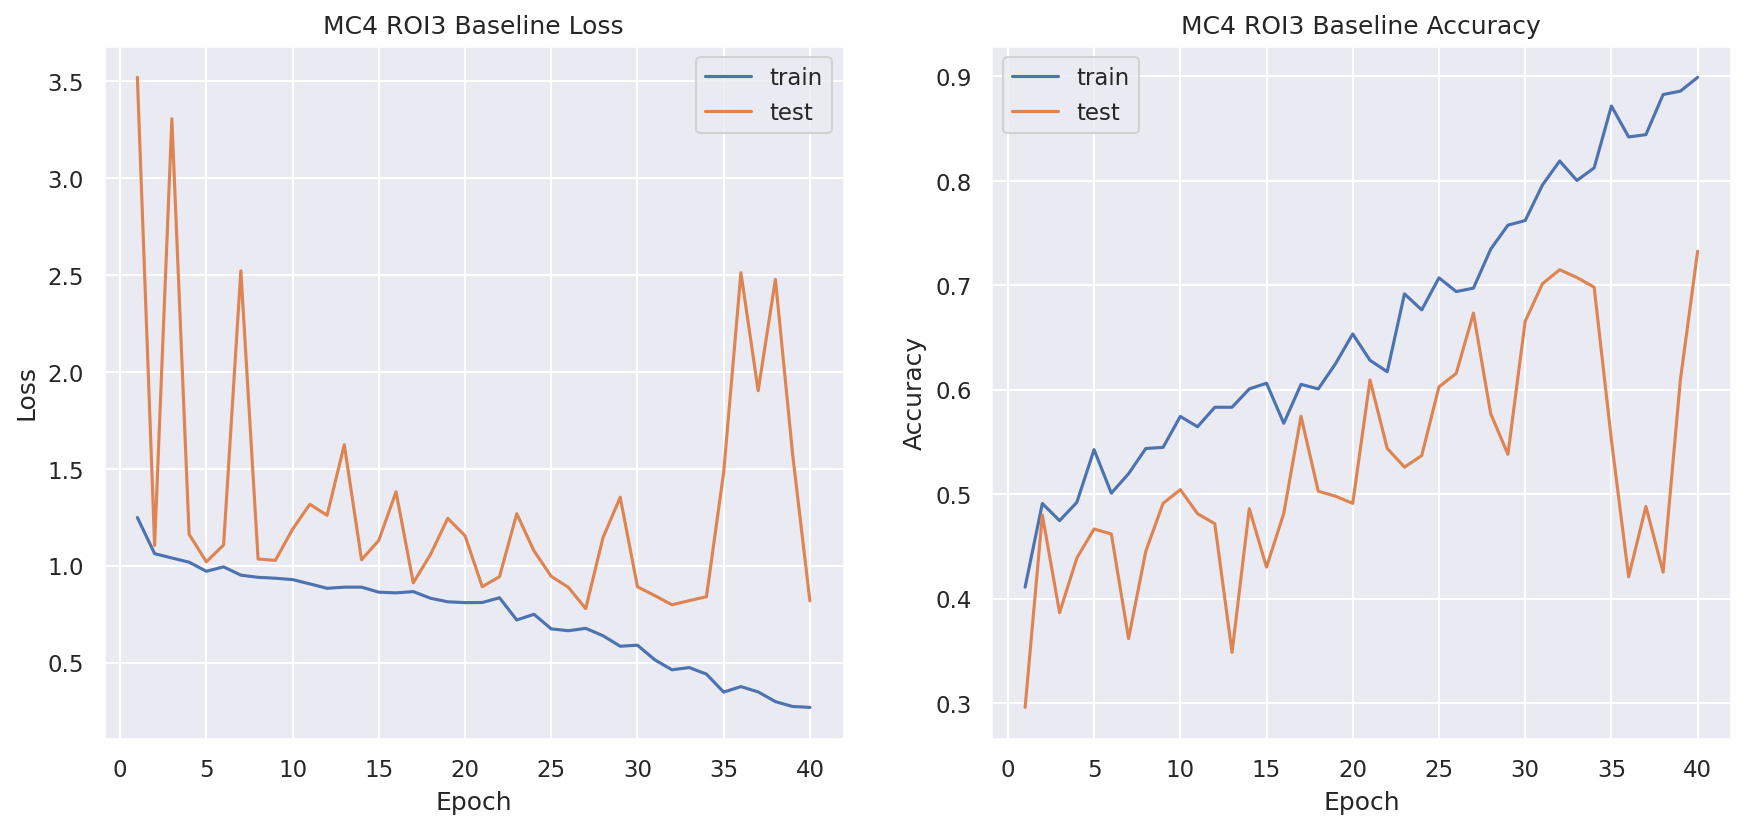

In [28]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'MC4 ROI3 Baseline')

In [29]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = MC4(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.7357859531772575
Precision: 0.767142430448882
Recall: 0.7374957000343998


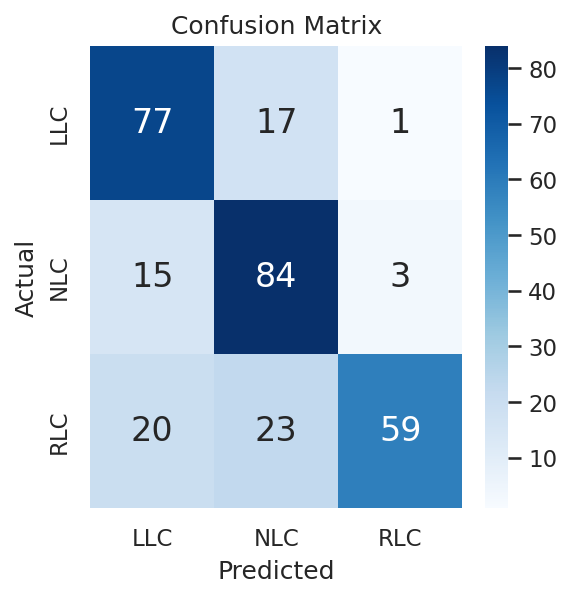

In [30]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

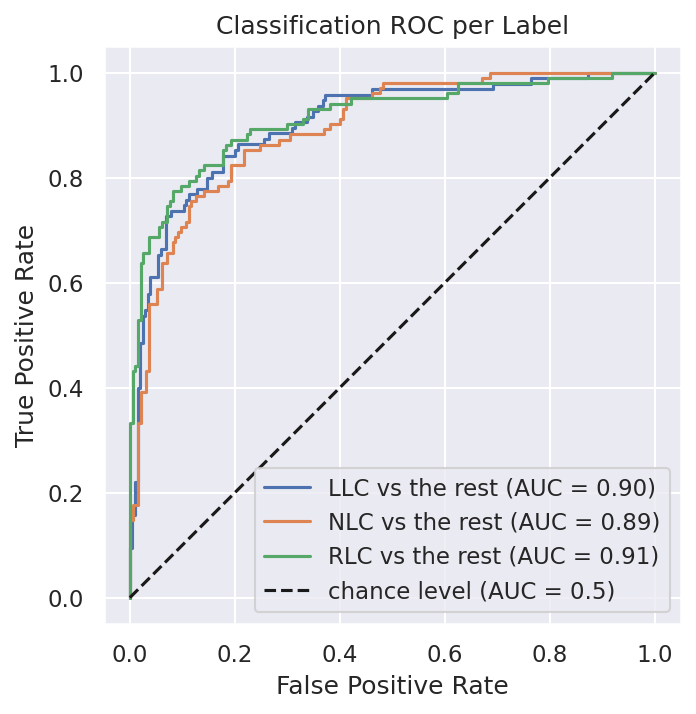

In [31]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

### **ROI 4:**

In [32]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 4'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True)

test_dir = './datasets/test/Recognition/ROI 4'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [33]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'MC4_ROI4_recognition_baseline')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = MC4(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 57/57 [03:22<00:00,  3.55s/it, acc=0.428, loss=1.2]


Epoch: 1 | train_loss: 1.1992 | train_acc: 0.4276 | test_loss: 1.1052 | test_acc: 0.4178


Epoch [2/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.454, loss=1.06]


Epoch: 2 | train_loss: 1.0551 | train_acc: 0.4539 | test_loss: 1.0745 | test_acc: 0.4913


Epoch [3/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.478, loss=1.02]


Epoch: 3 | train_loss: 1.0226 | train_acc: 0.4781 | test_loss: 1.4938 | test_acc: 0.4671


Epoch [4/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.488, loss=1.01]


Epoch: 4 | train_loss: 1.0095 | train_acc: 0.4879 | test_loss: 1.2026 | test_acc: 0.4208


Epoch [5/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.507, loss=0.987]


Epoch: 5 | train_loss: 0.9874 | train_acc: 0.5066 | test_loss: 1.4668 | test_acc: 0.4028


Epoch [6/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.514, loss=0.965]


Epoch: 6 | train_loss: 0.9649 | train_acc: 0.5143 | test_loss: 1.0739 | test_acc: 0.4779


Epoch [7/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.529, loss=0.971]


Epoch: 7 | train_loss: 0.9712 | train_acc: 0.5285 | test_loss: 1.0843 | test_acc: 0.4862


Epoch [8/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.529, loss=0.958]


Epoch: 8 | train_loss: 0.9584 | train_acc: 0.5285 | test_loss: 2.7768 | test_acc: 0.3586


Epoch [9/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.529, loss=0.949]


Epoch: 9 | train_loss: 0.9491 | train_acc: 0.5285 | test_loss: 1.3724 | test_acc: 0.4539


Epoch [10/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.567, loss=0.922]


Epoch: 10 | train_loss: 0.9223 | train_acc: 0.5669 | test_loss: 1.0028 | test_acc: 0.4931


Epoch [11/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.549, loss=0.923]


Epoch: 11 | train_loss: 0.9233 | train_acc: 0.5493 | test_loss: 0.9633 | test_acc: 0.5269


Epoch [12/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.578, loss=0.895]


Epoch: 12 | train_loss: 0.8955 | train_acc: 0.5779 | test_loss: 1.0161 | test_acc: 0.5179


Epoch [13/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.576, loss=0.893]


Epoch: 13 | train_loss: 0.8935 | train_acc: 0.5757 | test_loss: 0.9897 | test_acc: 0.5054


Epoch [14/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.596, loss=0.856]


Epoch: 14 | train_loss: 0.8563 | train_acc: 0.5965 | test_loss: 0.9278 | test_acc: 0.5810


Epoch [15/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.573, loss=0.881]


Epoch: 15 | train_loss: 0.8810 | train_acc: 0.5735 | test_loss: 1.0162 | test_acc: 0.5302


Epoch [16/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.621, loss=0.852]


Epoch: 16 | train_loss: 0.8519 | train_acc: 0.6206 | test_loss: 1.0328 | test_acc: 0.5096


Epoch [17/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.596, loss=0.86]


Epoch: 17 | train_loss: 0.8595 | train_acc: 0.5965 | test_loss: 1.2364 | test_acc: 0.4701


Epoch [18/40]: 100%|██████████| 57/57 [03:17<00:00,  3.47s/it, acc=0.623, loss=0.823]


Epoch: 18 | train_loss: 0.8232 | train_acc: 0.6228 | test_loss: 1.1900 | test_acc: 0.5057


Epoch [19/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.624, loss=0.806]


Epoch: 19 | train_loss: 0.8059 | train_acc: 0.6239 | test_loss: 2.2097 | test_acc: 0.4043


Epoch [20/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.663, loss=0.805]


Epoch: 20 | train_loss: 0.8052 | train_acc: 0.6634 | test_loss: 1.2333 | test_acc: 0.5275


Epoch [21/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.634, loss=0.824]


Epoch: 21 | train_loss: 0.8236 | train_acc: 0.6338 | test_loss: 3.2518 | test_acc: 0.4040


Epoch [22/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.645, loss=0.769]


Epoch: 22 | train_loss: 0.7689 | train_acc: 0.6447 | test_loss: 1.0565 | test_acc: 0.5338


Epoch [23/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.67, loss=0.755]


Epoch: 23 | train_loss: 0.7553 | train_acc: 0.6700 | test_loss: 0.9000 | test_acc: 0.5631


Epoch [24/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.67, loss=0.757]


Epoch: 24 | train_loss: 0.7574 | train_acc: 0.6700 | test_loss: 0.9924 | test_acc: 0.6011


Epoch [25/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.686, loss=0.7]


Epoch: 25 | train_loss: 0.7002 | train_acc: 0.6864 | test_loss: 0.9306 | test_acc: 0.6220


Epoch [26/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.674, loss=0.74]


Epoch: 26 | train_loss: 0.7402 | train_acc: 0.6743 | test_loss: 0.8060 | test_acc: 0.6226


Epoch [27/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.702, loss=0.696]


Epoch: 27 | train_loss: 0.6964 | train_acc: 0.7018 | test_loss: 1.0361 | test_acc: 0.5469


Epoch [28/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.718, loss=0.628]


Epoch: 28 | train_loss: 0.6281 | train_acc: 0.7182 | test_loss: 1.0056 | test_acc: 0.6056


Epoch [29/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.723, loss=0.643]


Epoch: 29 | train_loss: 0.6427 | train_acc: 0.7226 | test_loss: 1.9820 | test_acc: 0.4124


Epoch [30/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.757, loss=0.595]


Epoch: 30 | train_loss: 0.5954 | train_acc: 0.7566 | test_loss: 0.8163 | test_acc: 0.6630


Epoch [31/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.751, loss=0.562]


Epoch: 31 | train_loss: 0.5615 | train_acc: 0.7511 | test_loss: 1.1864 | test_acc: 0.5467


Epoch [32/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.78, loss=0.553]


Epoch: 32 | train_loss: 0.5528 | train_acc: 0.7796 | test_loss: 0.9568 | test_acc: 0.6322


Epoch [33/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.821, loss=0.473]


Epoch: 33 | train_loss: 0.4732 | train_acc: 0.8213 | test_loss: 1.6258 | test_acc: 0.5129


Epoch [34/40]: 100%|██████████| 57/57 [03:16<00:00,  3.44s/it, acc=0.826, loss=0.406]


Epoch: 34 | train_loss: 0.4062 | train_acc: 0.8257 | test_loss: 0.8010 | test_acc: 0.6863


Epoch [35/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.815, loss=0.463]


Epoch: 35 | train_loss: 0.4630 | train_acc: 0.8147 | test_loss: 1.4253 | test_acc: 0.5655


Epoch [36/40]: 100%|██████████| 57/57 [03:15<00:00,  3.44s/it, acc=0.818, loss=0.45]


Epoch: 36 | train_loss: 0.4502 | train_acc: 0.8180 | test_loss: 0.8948 | test_acc: 0.6764


Epoch [37/40]: 100%|██████████| 57/57 [03:15<00:00,  3.43s/it, acc=0.886, loss=0.325]


Epoch: 37 | train_loss: 0.3252 | train_acc: 0.8860 | test_loss: 1.1379 | test_acc: 0.6319


Epoch [38/40]: 100%|██████████| 57/57 [03:17<00:00,  3.46s/it, acc=0.846, loss=0.359]


Epoch: 38 | train_loss: 0.3586 | train_acc: 0.8465 | test_loss: 0.7794 | test_acc: 0.7111


Epoch [39/40]: 100%|██████████| 57/57 [03:16<00:00,  3.46s/it, acc=0.898, loss=0.281]


Epoch: 39 | train_loss: 0.2813 | train_acc: 0.8980 | test_loss: 1.0414 | test_acc: 0.6869


Epoch [40/40]: 100%|██████████| 57/57 [03:16<00:00,  3.45s/it, acc=0.871, loss=0.278]


Epoch: 40 | train_loss: 0.2779 | train_acc: 0.8706 | test_loss: 0.8799 | test_acc: 0.7042
Total training time: 9089.740 seconds


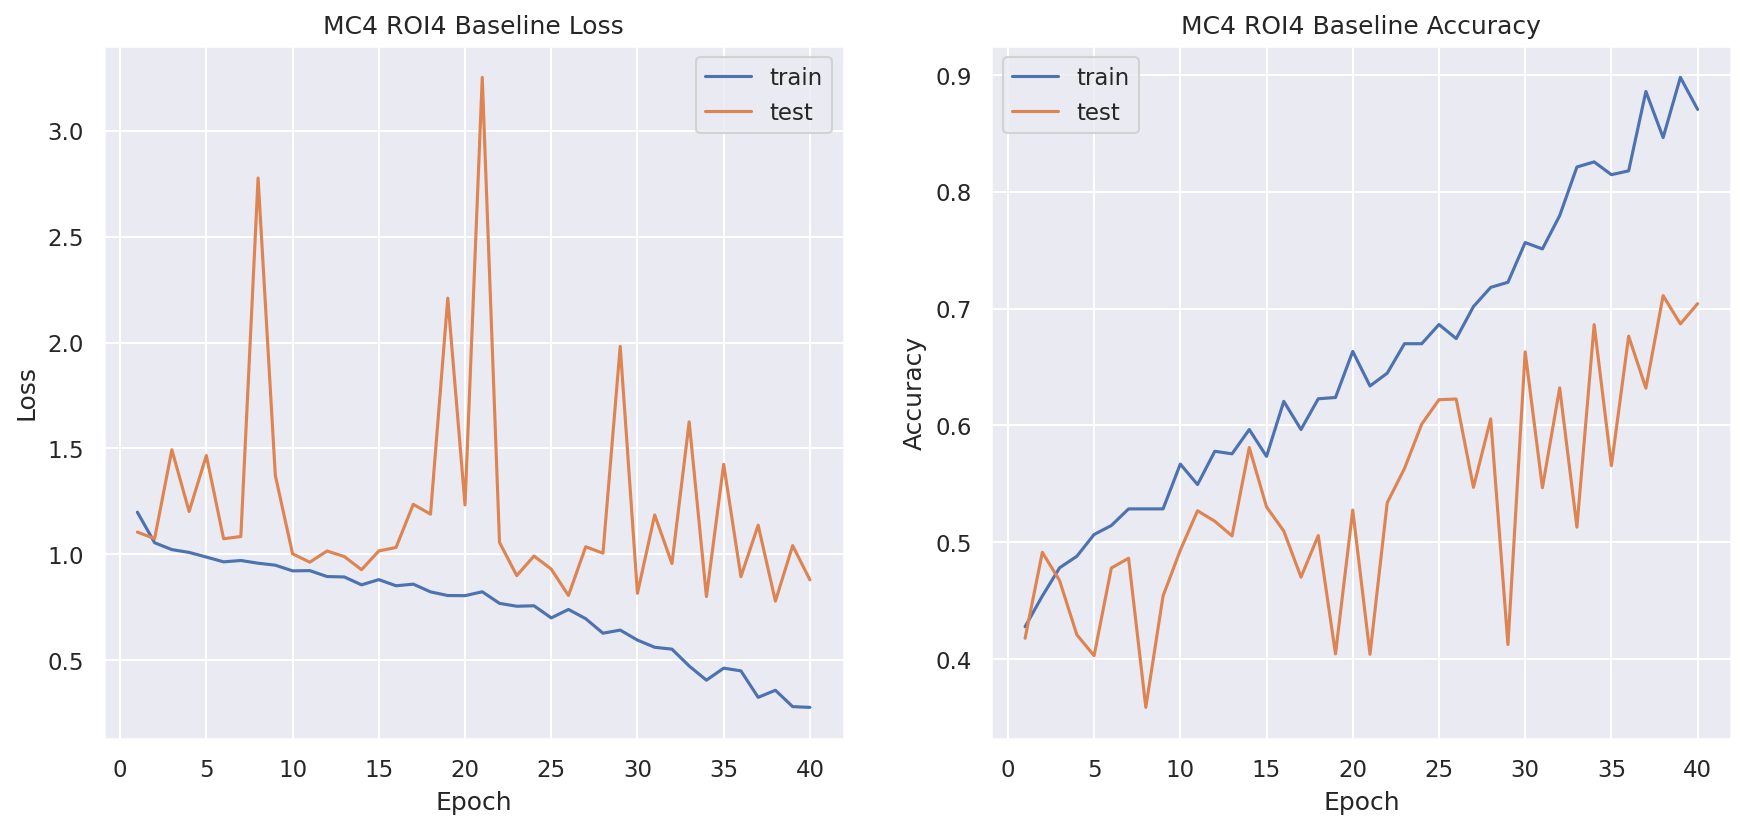

In [34]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'MC4 ROI4 Baseline')

In [35]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = MC4(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.7123745819397993
Precision: 0.715651791290524
Recall: 0.709563123495012


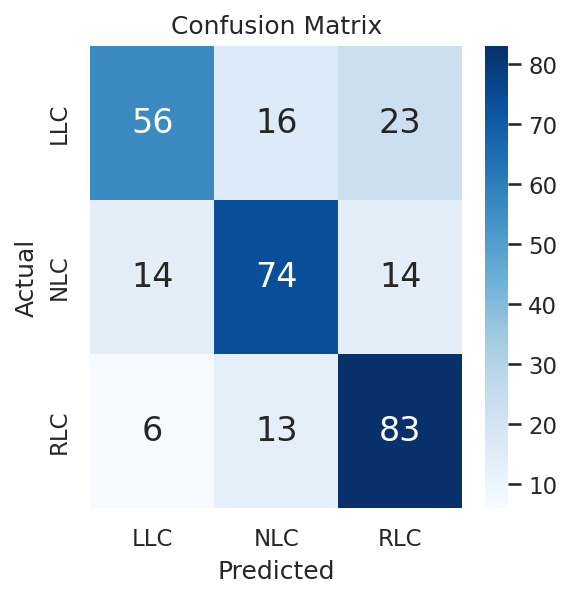

In [36]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

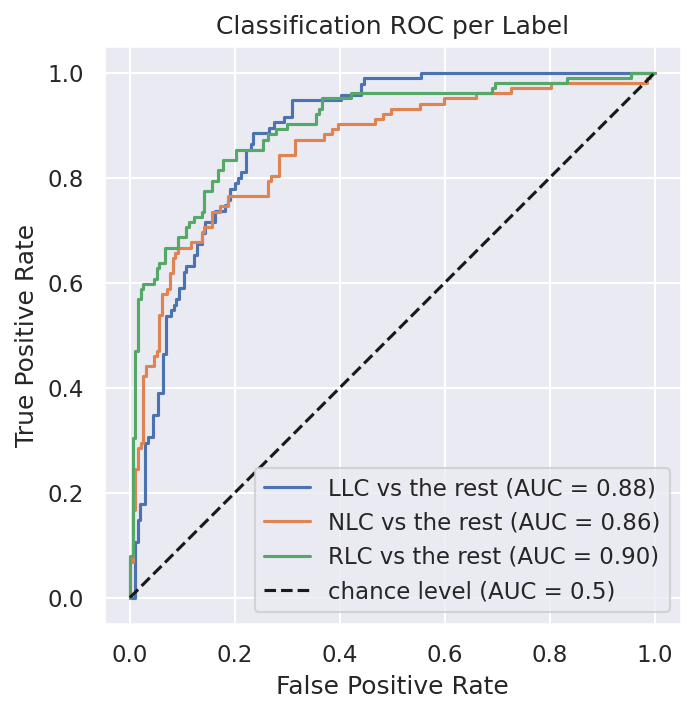

In [37]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

# **Recognition**

These experiments are for the lane change recognition task. Here we look at how the model performs on a data augmented dataset and how the size of the region of interest affects the performances. All the models are evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the following:
- Train set size: 5100
- Test set size: 299
- Adam optimizer with a learning rate 1e-3
- Epochs: 40
- Batch size: 16


## **ROI 2**

In [7]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 5100
Test data: 299


In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'MC4_ROI2_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = MC4(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [04:18<00:00,  1.24it/s, acc=0.48, loss=1.05]


Epoch: 1 | train_loss: 1.0453 | train_acc: 0.4803 | test_loss: 1.0982 | test_acc: 0.3687


Epoch [2/40]: 100%|██████████| 319/319 [04:11<00:00,  1.27it/s, acc=0.536, loss=0.961]


Epoch: 2 | train_loss: 0.9610 | train_acc: 0.5362 | test_loss: 1.5082 | test_acc: 0.3553


Epoch [3/40]: 100%|██████████| 319/319 [04:06<00:00,  1.29it/s, acc=0.612, loss=0.856]


Epoch: 3 | train_loss: 0.8562 | train_acc: 0.6123 | test_loss: 1.7668 | test_acc: 0.4486


Epoch [4/40]: 100%|██████████| 319/319 [04:14<00:00,  1.25it/s, acc=0.706, loss=0.696]


Epoch: 4 | train_loss: 0.6963 | train_acc: 0.7062 | test_loss: 0.9146 | test_acc: 0.6029


Epoch [5/40]: 100%|██████████| 319/319 [04:13<00:00,  1.26it/s, acc=0.779, loss=0.548]


Epoch: 5 | train_loss: 0.5484 | train_acc: 0.7785 | test_loss: 1.2857 | test_acc: 0.6065


Epoch [6/40]: 100%|██████████| 319/319 [04:13<00:00,  1.26it/s, acc=0.818, loss=0.448]


Epoch: 6 | train_loss: 0.4483 | train_acc: 0.8176 | test_loss: 0.4684 | test_acc: 0.8197


Epoch [7/40]: 100%|██████████| 319/319 [04:07<00:00,  1.29it/s, acc=0.87, loss=0.336]


Epoch: 7 | train_loss: 0.3356 | train_acc: 0.8703 | test_loss: 0.6172 | test_acc: 0.7868


Epoch [8/40]: 100%|██████████| 319/319 [04:09<00:00,  1.28it/s, acc=0.9, loss=0.27]


Epoch: 8 | train_loss: 0.2697 | train_acc: 0.9004 | test_loss: 1.2674 | test_acc: 0.6489


Epoch [9/40]: 100%|██████████| 319/319 [04:04<00:00,  1.31it/s, acc=0.931, loss=0.193]


Epoch: 9 | train_loss: 0.1931 | train_acc: 0.9314 | test_loss: 0.6461 | test_acc: 0.7868


Epoch [10/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.939, loss=0.159]


Epoch: 10 | train_loss: 0.1586 | train_acc: 0.9392 | test_loss: 0.7114 | test_acc: 0.7850


Epoch [11/40]: 100%|██████████| 319/319 [04:03<00:00,  1.31it/s, acc=0.952, loss=0.136]


Epoch: 11 | train_loss: 0.1356 | train_acc: 0.9517 | test_loss: 0.8815 | test_acc: 0.7605


Epoch [12/40]: 100%|██████████| 319/319 [04:09<00:00,  1.28it/s, acc=0.965, loss=0.102]


Epoch: 12 | train_loss: 0.1024 | train_acc: 0.9645 | test_loss: 1.3792 | test_acc: 0.6743


Epoch [13/40]: 100%|██████████| 319/319 [04:09<00:00,  1.28it/s, acc=0.961, loss=0.102]


Epoch: 13 | train_loss: 0.1018 | train_acc: 0.9614 | test_loss: 1.0797 | test_acc: 0.7255


Epoch [14/40]: 100%|██████████| 319/319 [04:09<00:00,  1.28it/s, acc=0.98, loss=0.0587]


Epoch: 14 | train_loss: 0.0587 | train_acc: 0.9802 | test_loss: 0.7201 | test_acc: 0.7853


Epoch [15/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.98, loss=0.0559]


Epoch: 15 | train_loss: 0.0559 | train_acc: 0.9796 | test_loss: 0.5688 | test_acc: 0.8406


Epoch [16/40]: 100%|██████████| 319/319 [04:03<00:00,  1.31it/s, acc=0.97, loss=0.08]


Epoch: 16 | train_loss: 0.0800 | train_acc: 0.9703 | test_loss: 0.7916 | test_acc: 0.8062


Epoch [17/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.98, loss=0.0553]


Epoch: 17 | train_loss: 0.0553 | train_acc: 0.9802 | test_loss: 1.0991 | test_acc: 0.7575


Epoch [18/40]: 100%|██████████| 319/319 [04:06<00:00,  1.30it/s, acc=0.983, loss=0.0425]


Epoch: 18 | train_loss: 0.0425 | train_acc: 0.9828 | test_loss: 0.6970 | test_acc: 0.8227


Epoch [19/40]: 100%|██████████| 319/319 [04:03<00:00,  1.31it/s, acc=0.985, loss=0.0429]


Epoch: 19 | train_loss: 0.0429 | train_acc: 0.9851 | test_loss: 1.7690 | test_acc: 0.6654


Epoch [20/40]: 100%|██████████| 319/319 [04:03<00:00,  1.31it/s, acc=0.981, loss=0.0597]


Epoch: 20 | train_loss: 0.0597 | train_acc: 0.9806 | test_loss: 0.6790 | test_acc: 0.8242


Epoch [21/40]: 100%|██████████| 319/319 [04:03<00:00,  1.31it/s, acc=0.989, loss=0.03]


Epoch: 21 | train_loss: 0.0300 | train_acc: 0.9890 | test_loss: 0.9021 | test_acc: 0.8260


Epoch [22/40]: 100%|██████████| 319/319 [04:02<00:00,  1.32it/s, acc=0.998, loss=0.00914]


Epoch: 22 | train_loss: 0.0091 | train_acc: 0.9980 | test_loss: 0.7550 | test_acc: 0.8242


Epoch [23/40]: 100%|██████████| 319/319 [04:02<00:00,  1.31it/s, acc=0.98, loss=0.0539]


Epoch: 23 | train_loss: 0.0539 | train_acc: 0.9803 | test_loss: 1.2488 | test_acc: 0.7602


Epoch [24/40]: 100%|██████████| 319/319 [04:02<00:00,  1.32it/s, acc=0.984, loss=0.0435]


Epoch: 24 | train_loss: 0.0435 | train_acc: 0.9839 | test_loss: 0.6774 | test_acc: 0.8292


Epoch [25/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.986, loss=0.0358]


Epoch: 25 | train_loss: 0.0358 | train_acc: 0.9862 | test_loss: 0.8414 | test_acc: 0.8098


Epoch [26/40]: 100%|██████████| 319/319 [04:04<00:00,  1.31it/s, acc=0.991, loss=0.0285]


Epoch: 26 | train_loss: 0.0285 | train_acc: 0.9912 | test_loss: 0.7369 | test_acc: 0.8194


Epoch [27/40]: 100%|██████████| 319/319 [04:06<00:00,  1.29it/s, acc=0.992, loss=0.0229]


Epoch: 27 | train_loss: 0.0229 | train_acc: 0.9916 | test_loss: 0.8522 | test_acc: 0.8358


Epoch [28/40]: 100%|██████████| 319/319 [04:07<00:00,  1.29it/s, acc=0.987, loss=0.0336]


Epoch: 28 | train_loss: 0.0336 | train_acc: 0.9871 | test_loss: 0.8569 | test_acc: 0.8260


Epoch [29/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.986, loss=0.0376]


Epoch: 29 | train_loss: 0.0376 | train_acc: 0.9865 | test_loss: 0.8360 | test_acc: 0.8191


Epoch [30/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.991, loss=0.0261]


Epoch: 30 | train_loss: 0.0261 | train_acc: 0.9910 | test_loss: 0.9640 | test_acc: 0.8080


Epoch [31/40]: 100%|██████████| 319/319 [04:03<00:00,  1.31it/s, acc=0.986, loss=0.0427]


Epoch: 31 | train_loss: 0.0427 | train_acc: 0.9860 | test_loss: 1.1505 | test_acc: 0.7718


Epoch [32/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.986, loss=0.0411]


Epoch: 32 | train_loss: 0.0411 | train_acc: 0.9855 | test_loss: 0.7407 | test_acc: 0.8472


Epoch [33/40]: 100%|██████████| 319/319 [04:02<00:00,  1.32it/s, acc=0.996, loss=0.0107]


Epoch: 33 | train_loss: 0.0107 | train_acc: 0.9959 | test_loss: 0.7671 | test_acc: 0.8391


Epoch [34/40]: 100%|██████████| 319/319 [04:04<00:00,  1.31it/s, acc=0.994, loss=0.0182]


Epoch: 34 | train_loss: 0.0182 | train_acc: 0.9941 | test_loss: 1.1713 | test_acc: 0.7670


Epoch [35/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.991, loss=0.0255]


Epoch: 35 | train_loss: 0.0255 | train_acc: 0.9907 | test_loss: 1.4974 | test_acc: 0.7664


Epoch [36/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.986, loss=0.0315]


Epoch: 36 | train_loss: 0.0315 | train_acc: 0.9857 | test_loss: 1.3137 | test_acc: 0.7868


Epoch [37/40]: 100%|██████████| 319/319 [04:04<00:00,  1.31it/s, acc=0.993, loss=0.0201]


Epoch: 37 | train_loss: 0.0201 | train_acc: 0.9931 | test_loss: 0.9714 | test_acc: 0.8292


Epoch [38/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.996, loss=0.0116]


Epoch: 38 | train_loss: 0.0116 | train_acc: 0.9963 | test_loss: 0.9570 | test_acc: 0.8227


Epoch [39/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.997, loss=0.00722]


Epoch: 39 | train_loss: 0.0072 | train_acc: 0.9975 | test_loss: 0.9361 | test_acc: 0.8391


Epoch [40/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.995, loss=0.0184]


Epoch: 40 | train_loss: 0.0184 | train_acc: 0.9949 | test_loss: 0.8756 | test_acc: 0.8263
Total training time: 10324.422 seconds


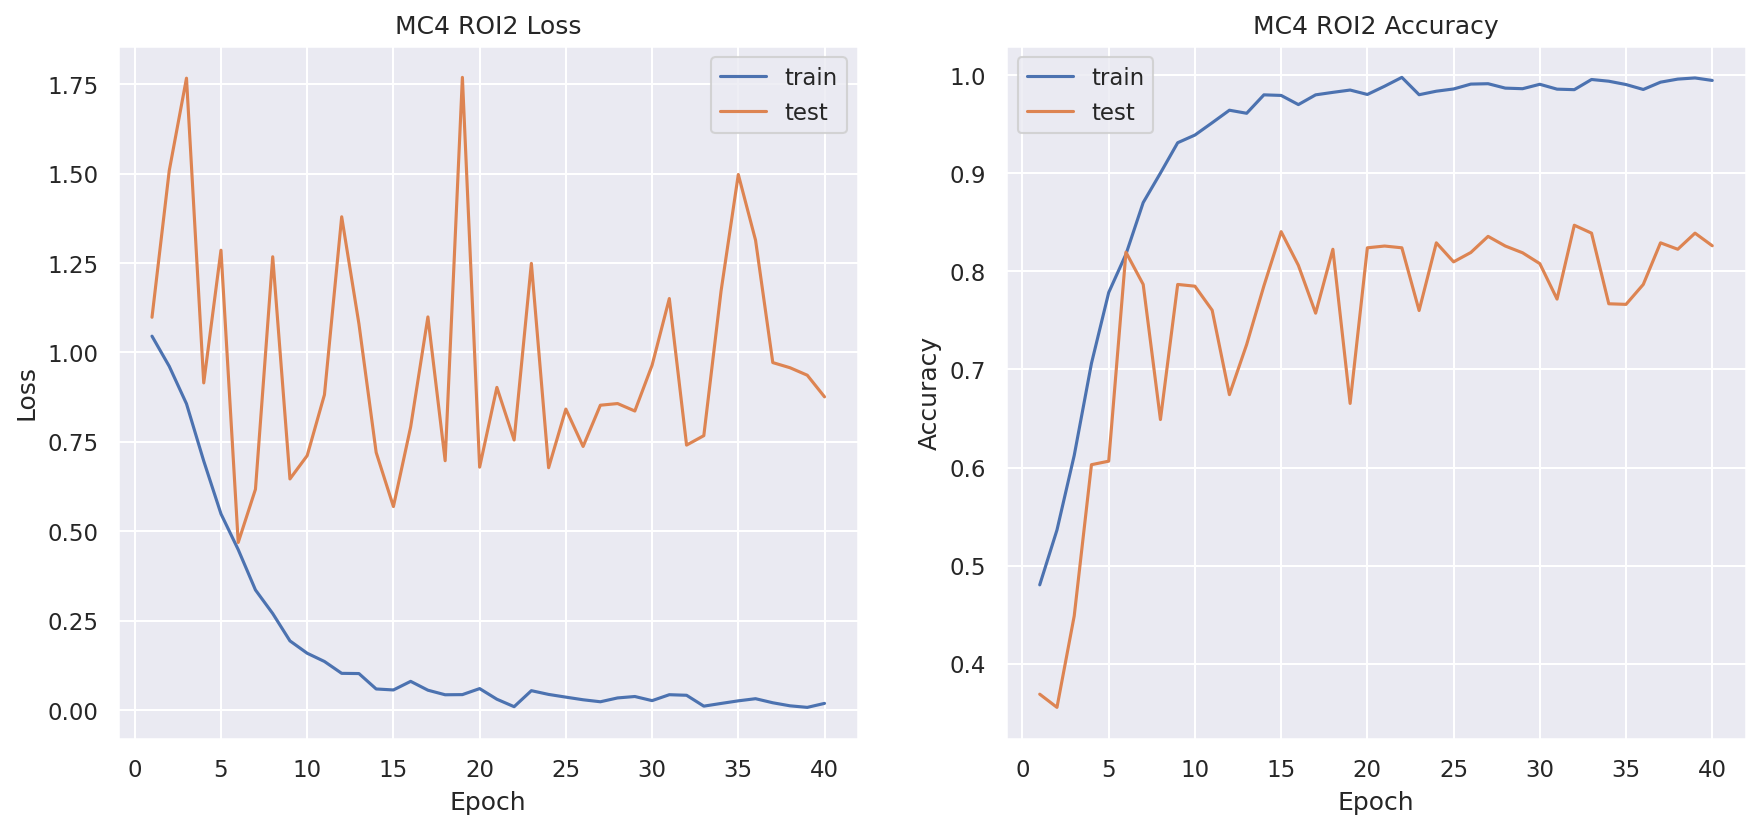

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'MC4 ROI2')

**Metrics:**

In [8]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = MC4(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8461538461538461
Precision: 0.8513157608044363
Recall: 0.8470244238046095


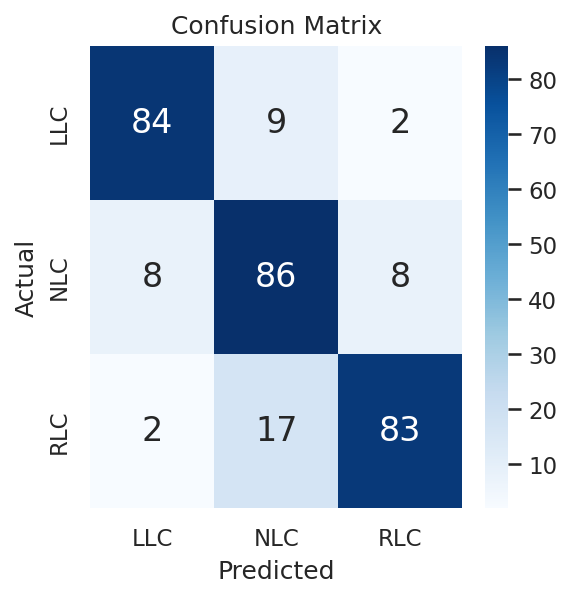

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

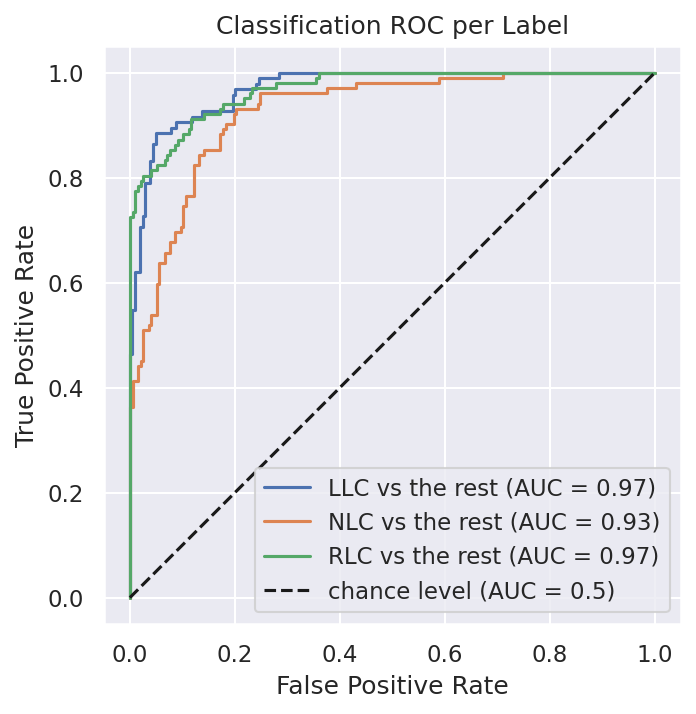

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

## **ROI 3**

In [10]:
train_dir = './datasets/train/Recognition/ROI 3'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 3'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'MC4_ROI3_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = MC4(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [04:11<00:00,  1.27it/s, acc=0.477, loss=1.05]


Epoch: 1 | train_loss: 1.0514 | train_acc: 0.4769 | test_loss: 1.0491 | test_acc: 0.4605


Epoch [2/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.54, loss=0.964]


Epoch: 2 | train_loss: 0.9636 | train_acc: 0.5398 | test_loss: 1.0588 | test_acc: 0.4112


Epoch [3/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.613, loss=0.87]


Epoch: 3 | train_loss: 0.8699 | train_acc: 0.6131 | test_loss: 1.0627 | test_acc: 0.5478


Epoch [4/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.706, loss=0.696]


Epoch: 4 | train_loss: 0.6961 | train_acc: 0.7058 | test_loss: 0.8793 | test_acc: 0.6355


Epoch [5/40]: 100%|██████████| 319/319 [04:02<00:00,  1.31it/s, acc=0.779, loss=0.536]


Epoch: 5 | train_loss: 0.5364 | train_acc: 0.7793 | test_loss: 0.9522 | test_acc: 0.6041


Epoch [6/40]: 100%|██████████| 319/319 [04:02<00:00,  1.32it/s, acc=0.822, loss=0.449]


Epoch: 6 | train_loss: 0.4492 | train_acc: 0.8220 | test_loss: 0.6879 | test_acc: 0.7611


Epoch [7/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.871, loss=0.343]


Epoch: 7 | train_loss: 0.3432 | train_acc: 0.8715 | test_loss: 0.9656 | test_acc: 0.6743


Epoch [8/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.895, loss=0.279]


Epoch: 8 | train_loss: 0.2790 | train_acc: 0.8947 | test_loss: 0.6587 | test_acc: 0.7682


Epoch [9/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.918, loss=0.226]


Epoch: 9 | train_loss: 0.2255 | train_acc: 0.9177 | test_loss: 0.6637 | test_acc: 0.7554


Epoch [10/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.932, loss=0.183]


Epoch: 10 | train_loss: 0.1828 | train_acc: 0.9320 | test_loss: 0.8747 | test_acc: 0.7545


Epoch [11/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.949, loss=0.147]


Epoch: 11 | train_loss: 0.1471 | train_acc: 0.9493 | test_loss: 0.6681 | test_acc: 0.8278


Epoch [12/40]: 100%|██████████| 319/319 [04:00<00:00,  1.32it/s, acc=0.964, loss=0.11]


Epoch: 12 | train_loss: 0.1103 | train_acc: 0.9641 | test_loss: 1.3210 | test_acc: 0.7395


Epoch [13/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.964, loss=0.0961]


Epoch: 13 | train_loss: 0.0961 | train_acc: 0.9639 | test_loss: 0.6807 | test_acc: 0.8146


Epoch [14/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.971, loss=0.0803]


Epoch: 14 | train_loss: 0.0803 | train_acc: 0.9710 | test_loss: 0.7434 | test_acc: 0.8014


Epoch [15/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.969, loss=0.0902]


Epoch: 15 | train_loss: 0.0902 | train_acc: 0.9692 | test_loss: 0.8094 | test_acc: 0.8313


Epoch [16/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.973, loss=0.0788]


Epoch: 16 | train_loss: 0.0788 | train_acc: 0.9732 | test_loss: 1.0470 | test_acc: 0.7656


Epoch [17/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.982, loss=0.0498]


Epoch: 17 | train_loss: 0.0498 | train_acc: 0.9823 | test_loss: 1.1227 | test_acc: 0.7309


Epoch [18/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.979, loss=0.0621]


Epoch: 18 | train_loss: 0.0621 | train_acc: 0.9788 | test_loss: 1.0194 | test_acc: 0.7838


Epoch [19/40]: 100%|██████████| 319/319 [03:58<00:00,  1.34it/s, acc=0.982, loss=0.0541]


Epoch: 19 | train_loss: 0.0541 | train_acc: 0.9824 | test_loss: 0.8398 | test_acc: 0.8149


Epoch [20/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.981, loss=0.0543]


Epoch: 20 | train_loss: 0.0543 | train_acc: 0.9808 | test_loss: 1.2237 | test_acc: 0.7509


Epoch [21/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.986, loss=0.0328]


Epoch: 21 | train_loss: 0.0328 | train_acc: 0.9858 | test_loss: 0.9821 | test_acc: 0.8083


Epoch [22/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.984, loss=0.0396]


Epoch: 22 | train_loss: 0.0396 | train_acc: 0.9839 | test_loss: 1.1451 | test_acc: 0.8182


Epoch [23/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.986, loss=0.041]


Epoch: 23 | train_loss: 0.0410 | train_acc: 0.9863 | test_loss: 1.0196 | test_acc: 0.7656


Epoch [24/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.986, loss=0.0404]


Epoch: 24 | train_loss: 0.0404 | train_acc: 0.9855 | test_loss: 1.0258 | test_acc: 0.7919


Epoch [25/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.982, loss=0.0476]


Epoch: 25 | train_loss: 0.0476 | train_acc: 0.9824 | test_loss: 1.0030 | test_acc: 0.8083


Epoch [26/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.991, loss=0.0261]


Epoch: 26 | train_loss: 0.0261 | train_acc: 0.9908 | test_loss: 1.0312 | test_acc: 0.8248


Epoch [27/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.989, loss=0.033]


Epoch: 27 | train_loss: 0.0330 | train_acc: 0.9885 | test_loss: 1.0316 | test_acc: 0.7787


Epoch [28/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.99, loss=0.0284]


Epoch: 28 | train_loss: 0.0284 | train_acc: 0.9896 | test_loss: 0.8605 | test_acc: 0.8343


Epoch [29/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.994, loss=0.019]


Epoch: 29 | train_loss: 0.0190 | train_acc: 0.9937 | test_loss: 0.9965 | test_acc: 0.8164


Epoch [30/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.983, loss=0.048]


Epoch: 30 | train_loss: 0.0480 | train_acc: 0.9833 | test_loss: 1.0953 | test_acc: 0.7736


Epoch [31/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.988, loss=0.0383]


Epoch: 31 | train_loss: 0.0383 | train_acc: 0.9879 | test_loss: 1.1184 | test_acc: 0.8164


Epoch [32/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.991, loss=0.0278]


Epoch: 32 | train_loss: 0.0278 | train_acc: 0.9912 | test_loss: 0.9540 | test_acc: 0.7967


Epoch [33/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.994, loss=0.0196]


Epoch: 33 | train_loss: 0.0196 | train_acc: 0.9941 | test_loss: 0.9435 | test_acc: 0.8083


Epoch [34/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.996, loss=0.0134]


Epoch: 34 | train_loss: 0.0134 | train_acc: 0.9961 | test_loss: 1.3047 | test_acc: 0.8017


Epoch [35/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.987, loss=0.0392]


Epoch: 35 | train_loss: 0.0392 | train_acc: 0.9871 | test_loss: 1.1054 | test_acc: 0.7871


Epoch [36/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.995, loss=0.0123]


Epoch: 36 | train_loss: 0.0123 | train_acc: 0.9955 | test_loss: 1.0704 | test_acc: 0.7934


Epoch [37/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.994, loss=0.0152]


Epoch: 37 | train_loss: 0.0152 | train_acc: 0.9943 | test_loss: 1.1213 | test_acc: 0.7703


Epoch [38/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.993, loss=0.0205]


Epoch: 38 | train_loss: 0.0205 | train_acc: 0.9931 | test_loss: 1.1795 | test_acc: 0.7952


Epoch [39/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.989, loss=0.0301]


Epoch: 39 | train_loss: 0.0301 | train_acc: 0.9888 | test_loss: 1.0706 | test_acc: 0.8017


Epoch [40/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.992, loss=0.0214]


Epoch: 40 | train_loss: 0.0214 | train_acc: 0.9919 | test_loss: 1.2260 | test_acc: 0.8080
Total training time: 10084.421 seconds


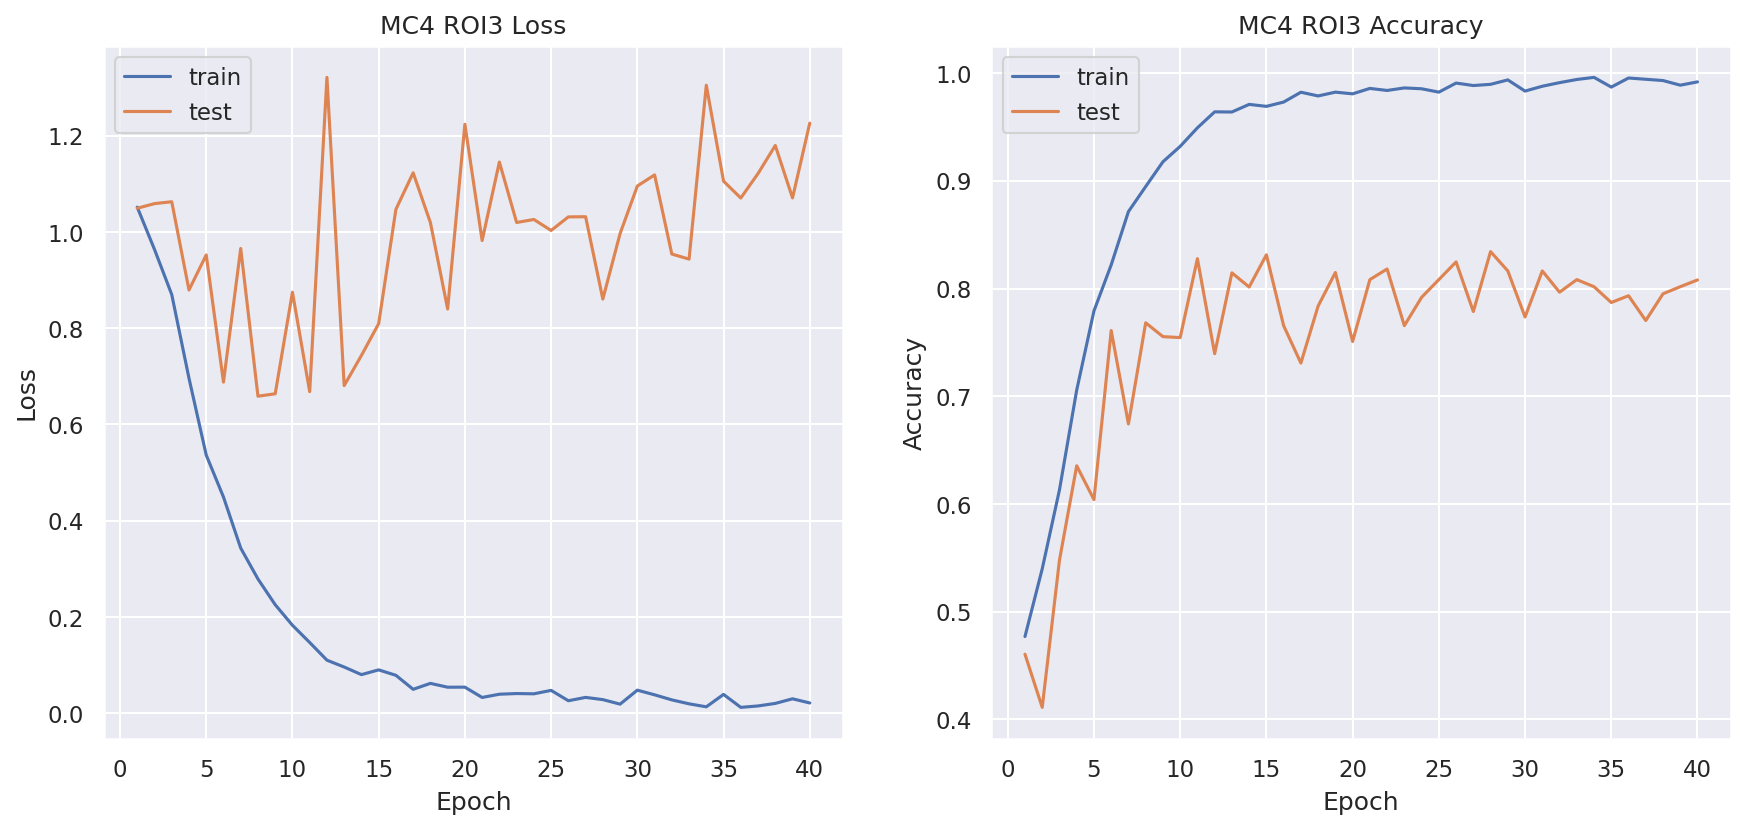

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'MC4 ROI3')

**Metrics:**

In [11]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
result_path = str(base/'MC4_ROI3_recognition')

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

checkpoint = torch.load(result_path+'/best_model.pth')
model = MC4(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8361204013377926
Precision: 0.8368232443548552
Recall: 0.8352941176470589


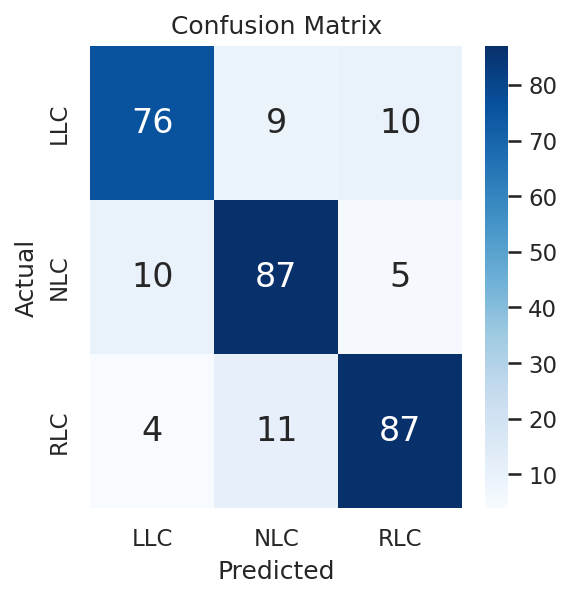

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

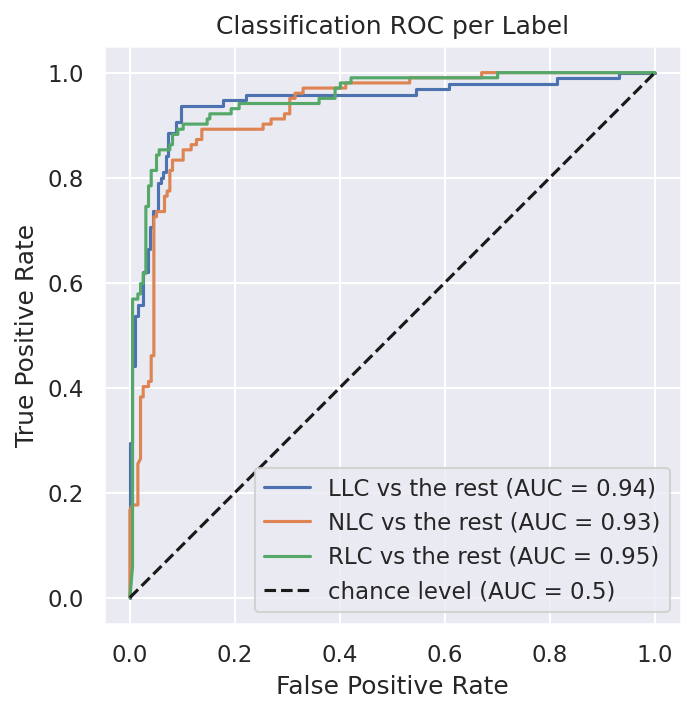

In [12]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

## **ROI 4**

In [13]:
train_dir = './datasets/train/Recognition/ROI 4'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 4'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'MC4_ROI4_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = MC4(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [04:06<00:00,  1.30it/s, acc=0.433, loss=1.08]


Epoch: 1 | train_loss: 1.0818 | train_acc: 0.4335 | test_loss: 1.6469 | test_acc: 0.3612


Epoch [2/40]: 100%|██████████| 319/319 [04:04<00:00,  1.31it/s, acc=0.485, loss=1.02]


Epoch: 2 | train_loss: 1.0158 | train_acc: 0.4854 | test_loss: 1.0135 | test_acc: 0.4728


Epoch [3/40]: 100%|██████████| 319/319 [04:03<00:00,  1.31it/s, acc=0.527, loss=0.96]


Epoch: 3 | train_loss: 0.9601 | train_acc: 0.5274 | test_loss: 1.0092 | test_acc: 0.4892


Epoch [4/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.568, loss=0.916]


Epoch: 4 | train_loss: 0.9164 | train_acc: 0.5682 | test_loss: 1.0459 | test_acc: 0.4859


Epoch [5/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.604, loss=0.863]


Epoch: 5 | train_loss: 0.8632 | train_acc: 0.6039 | test_loss: 1.0375 | test_acc: 0.5455


Epoch [6/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.645, loss=0.781]


Epoch: 6 | train_loss: 0.7809 | train_acc: 0.6452 | test_loss: 0.9059 | test_acc: 0.5709


Epoch [7/40]: 100%|██████████| 319/319 [04:04<00:00,  1.30it/s, acc=0.686, loss=0.724]


Epoch: 7 | train_loss: 0.7242 | train_acc: 0.6858 | test_loss: 0.8568 | test_acc: 0.6059


Epoch [8/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.715, loss=0.654]


Epoch: 8 | train_loss: 0.6537 | train_acc: 0.7150 | test_loss: 1.3724 | test_acc: 0.5469


Epoch [9/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.781, loss=0.53]


Epoch: 9 | train_loss: 0.5299 | train_acc: 0.7813 | test_loss: 0.6729 | test_acc: 0.7222


Epoch [10/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.844, loss=0.403]


Epoch: 10 | train_loss: 0.4031 | train_acc: 0.8436 | test_loss: 0.6472 | test_acc: 0.7437


Epoch [11/40]: 100%|██████████| 319/319 [04:04<00:00,  1.31it/s, acc=0.876, loss=0.31]


Epoch: 11 | train_loss: 0.3102 | train_acc: 0.8762 | test_loss: 0.6304 | test_acc: 0.7667


Epoch [12/40]: 100%|██████████| 319/319 [04:06<00:00,  1.30it/s, acc=0.903, loss=0.25]


Epoch: 12 | train_loss: 0.2505 | train_acc: 0.9032 | test_loss: 0.8582 | test_acc: 0.7303


Epoch [13/40]: 100%|██████████| 319/319 [04:06<00:00,  1.29it/s, acc=0.93, loss=0.189]


Epoch: 13 | train_loss: 0.1890 | train_acc: 0.9302 | test_loss: 0.6572 | test_acc: 0.7913


Epoch [14/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.947, loss=0.147]


Epoch: 14 | train_loss: 0.1472 | train_acc: 0.9471 | test_loss: 0.7754 | test_acc: 0.7336


Epoch [15/40]: 100%|██████████| 319/319 [04:06<00:00,  1.29it/s, acc=0.947, loss=0.138]


Epoch: 15 | train_loss: 0.1382 | train_acc: 0.9472 | test_loss: 0.8423 | test_acc: 0.7225


Epoch [16/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.966, loss=0.103]


Epoch: 16 | train_loss: 0.1030 | train_acc: 0.9659 | test_loss: 0.6261 | test_acc: 0.8209


Epoch [17/40]: 100%|██████████| 319/319 [04:05<00:00,  1.30it/s, acc=0.963, loss=0.094]


Epoch: 17 | train_loss: 0.0940 | train_acc: 0.9632 | test_loss: 0.7928 | test_acc: 0.7685


Epoch [18/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.966, loss=0.0954]


Epoch: 18 | train_loss: 0.0954 | train_acc: 0.9663 | test_loss: 0.7053 | test_acc: 0.7784


Epoch [19/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.976, loss=0.0656]


Epoch: 19 | train_loss: 0.0656 | train_acc: 0.9759 | test_loss: 0.7992 | test_acc: 0.8011


Epoch [20/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.975, loss=0.0665]


Epoch: 20 | train_loss: 0.0665 | train_acc: 0.9751 | test_loss: 0.8585 | test_acc: 0.7781


Epoch [21/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.981, loss=0.0513]


Epoch: 21 | train_loss: 0.0513 | train_acc: 0.9810 | test_loss: 0.8925 | test_acc: 0.7880


Epoch [22/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.975, loss=0.0667]


Epoch: 22 | train_loss: 0.0667 | train_acc: 0.9749 | test_loss: 0.9085 | test_acc: 0.7700


Epoch [23/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.982, loss=0.0517]


Epoch: 23 | train_loss: 0.0517 | train_acc: 0.9816 | test_loss: 0.9858 | test_acc: 0.7832


Epoch [24/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.986, loss=0.0421]


Epoch: 24 | train_loss: 0.0421 | train_acc: 0.9859 | test_loss: 0.6162 | test_acc: 0.8289


Epoch [25/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.979, loss=0.0592]


Epoch: 25 | train_loss: 0.0592 | train_acc: 0.9788 | test_loss: 0.8044 | test_acc: 0.7883


Epoch [26/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.983, loss=0.0497]


Epoch: 26 | train_loss: 0.0497 | train_acc: 0.9828 | test_loss: 0.8084 | test_acc: 0.7931


Epoch [27/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.986, loss=0.0383]


Epoch: 27 | train_loss: 0.0383 | train_acc: 0.9861 | test_loss: 0.7497 | test_acc: 0.7670


Epoch [28/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.991, loss=0.028]


Epoch: 28 | train_loss: 0.0280 | train_acc: 0.9908 | test_loss: 0.7370 | test_acc: 0.8029


Epoch [29/40]: 100%|██████████| 319/319 [04:02<00:00,  1.31it/s, acc=0.984, loss=0.0428]


Epoch: 29 | train_loss: 0.0428 | train_acc: 0.9841 | test_loss: 0.7593 | test_acc: 0.7978


Epoch [30/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.983, loss=0.0453]


Epoch: 30 | train_loss: 0.0453 | train_acc: 0.9833 | test_loss: 0.9676 | test_acc: 0.7847


Epoch [31/40]: 100%|██████████| 319/319 [04:00<00:00,  1.32it/s, acc=0.988, loss=0.0333]


Epoch: 31 | train_loss: 0.0333 | train_acc: 0.9875 | test_loss: 0.8848 | test_acc: 0.7901


Epoch [32/40]: 100%|██████████| 319/319 [04:00<00:00,  1.32it/s, acc=0.99, loss=0.0335]


Epoch: 32 | train_loss: 0.0335 | train_acc: 0.9900 | test_loss: 0.7821 | test_acc: 0.7978


Epoch [33/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.989, loss=0.0345]


Epoch: 33 | train_loss: 0.0345 | train_acc: 0.9888 | test_loss: 1.2110 | test_acc: 0.7566


Epoch [34/40]: 100%|██████████| 319/319 [04:00<00:00,  1.32it/s, acc=0.988, loss=0.0303]


Epoch: 34 | train_loss: 0.0303 | train_acc: 0.9884 | test_loss: 0.8660 | test_acc: 0.7685


Epoch [35/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.992, loss=0.0229]


Epoch: 35 | train_loss: 0.0229 | train_acc: 0.9919 | test_loss: 0.8757 | test_acc: 0.7949


Epoch [36/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.994, loss=0.0189]


Epoch: 36 | train_loss: 0.0189 | train_acc: 0.9943 | test_loss: 0.9274 | test_acc: 0.8026


Epoch [37/40]: 100%|██████████| 319/319 [03:59<00:00,  1.33it/s, acc=0.995, loss=0.0197]


Epoch: 37 | train_loss: 0.0197 | train_acc: 0.9947 | test_loss: 0.9427 | test_acc: 0.8014


Epoch [38/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.99, loss=0.0325]


Epoch: 38 | train_loss: 0.0325 | train_acc: 0.9896 | test_loss: 1.4879 | test_acc: 0.7467


Epoch [39/40]: 100%|██████████| 319/319 [04:00<00:00,  1.33it/s, acc=0.99, loss=0.0305]


Epoch: 39 | train_loss: 0.0305 | train_acc: 0.9902 | test_loss: 0.9266 | test_acc: 0.7799


Epoch [40/40]: 100%|██████████| 319/319 [04:01<00:00,  1.32it/s, acc=0.985, loss=0.0484]


Epoch: 40 | train_loss: 0.0484 | train_acc: 0.9847 | test_loss: 0.7534 | test_acc: 0.8080
Total training time: 10193.079 seconds


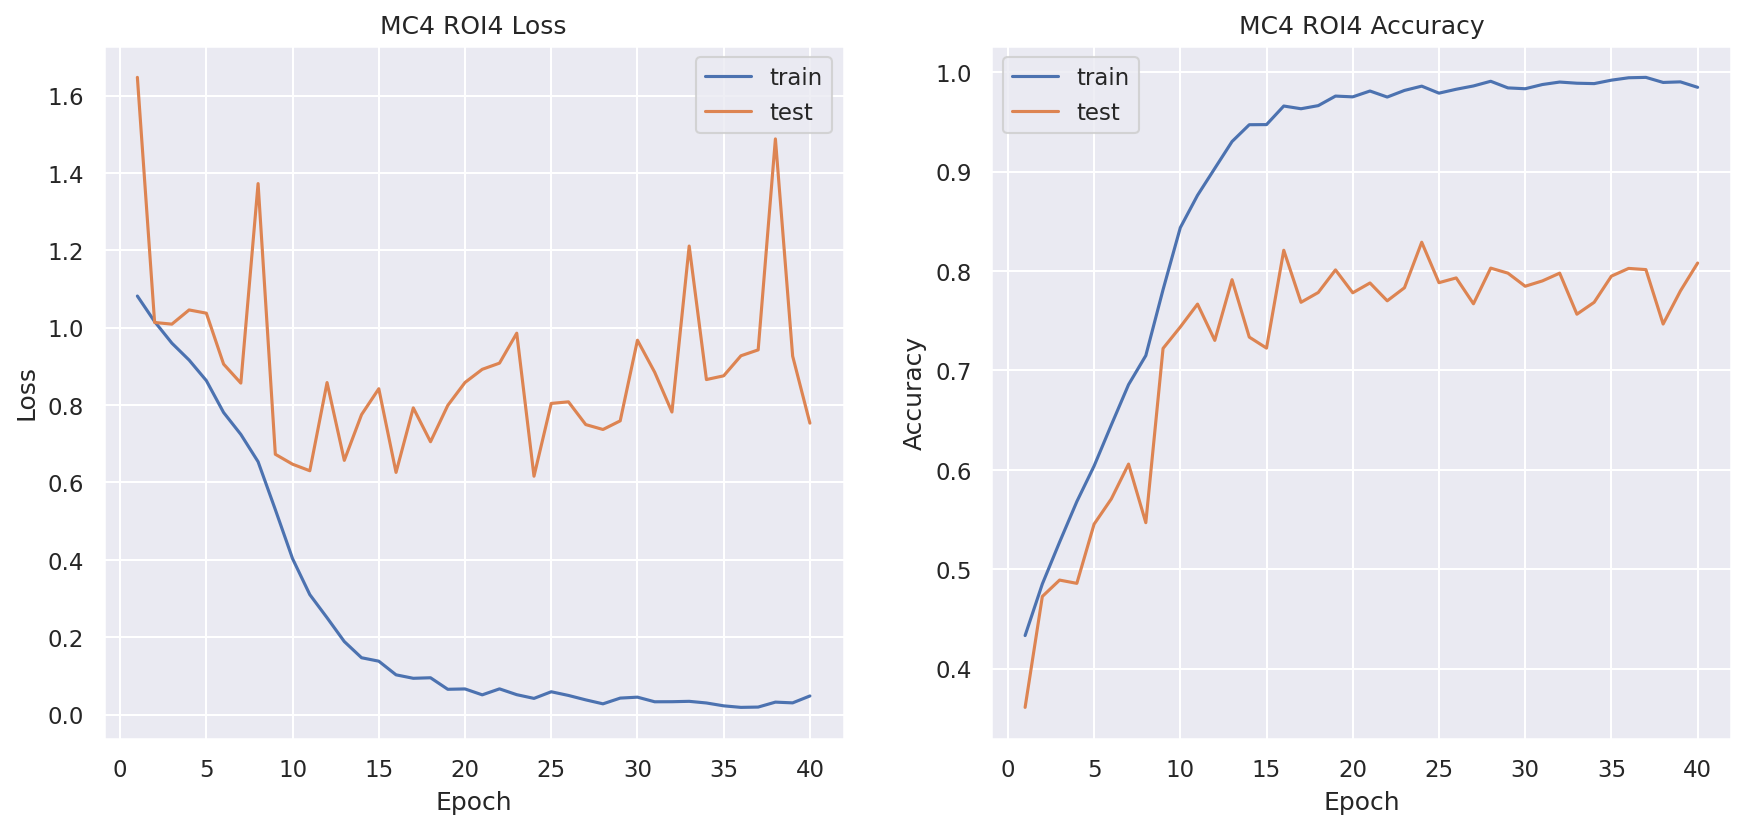

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'MC4 ROI4')

**Metrics:**

In [14]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
result_path = str(base/'MC4_ROI4_recognition')

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

checkpoint = torch.load(result_path+'/best_model.pth')
model = MC4(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8260869565217391
Precision: 0.8269405503634476
Recall: 0.8259717922256623


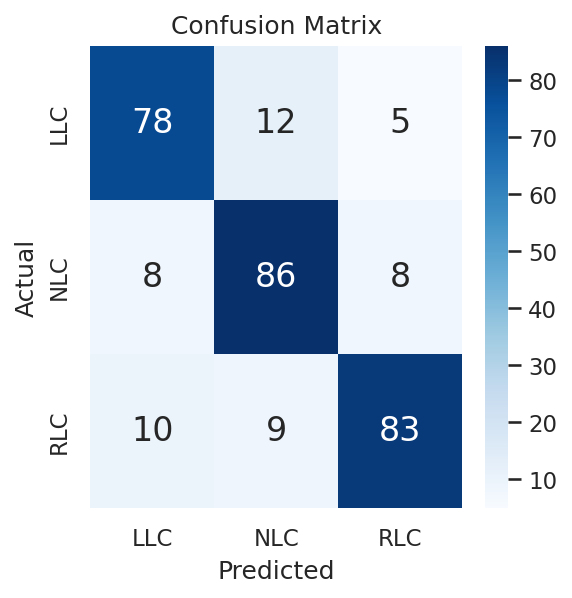

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

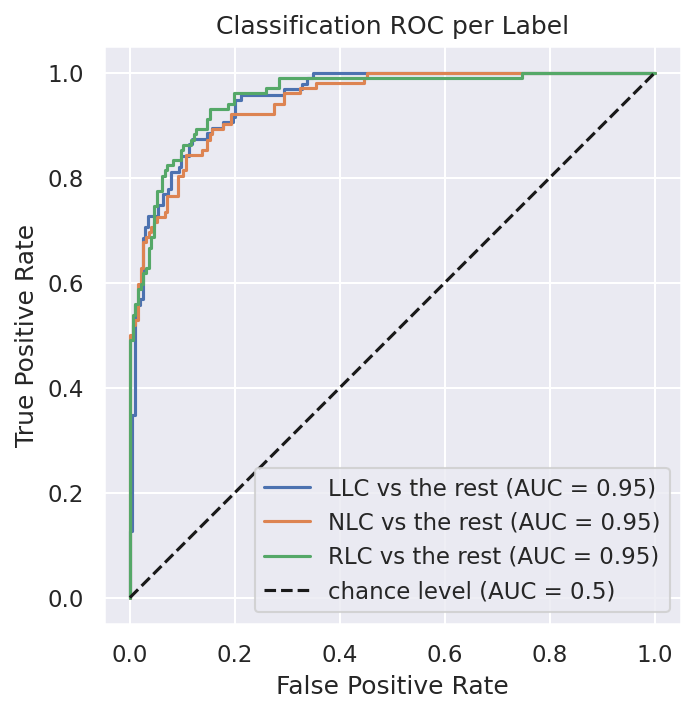

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

# **Prediction**

These experiments are for the lane change prediction task. Here we look at how the model performs on trying to predict the lane changes using the best ROI from the recognition experiments. All the models are again evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the same as above.

In [16]:
# setup videofolder to download the data with ROI x2
train_dir = './datasets/train/Prediction/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Prediction/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 5100
Test data: 299


In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'MC4_ROI2_prediction')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = MC4(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [18:52<00:00,  3.55s/it, acc=0.442, loss=1.07]


Epoch: 1 | train_loss: 1.0685 | train_acc: 0.4415 | test_loss: 1.0051 | test_acc: 0.4868


Epoch [2/40]: 100%|██████████| 319/319 [18:35<00:00,  3.50s/it, acc=0.513, loss=0.979]


Epoch: 2 | train_loss: 0.9787 | train_acc: 0.5128 | test_loss: 0.9194 | test_acc: 0.5580


Epoch [3/40]: 100%|██████████| 319/319 [18:36<00:00,  3.50s/it, acc=0.588, loss=0.896]


Epoch: 3 | train_loss: 0.8960 | train_acc: 0.5878 | test_loss: 1.5938 | test_acc: 0.4193


Epoch [4/40]: 100%|██████████| 319/319 [18:36<00:00,  3.50s/it, acc=0.628, loss=0.833]


Epoch: 4 | train_loss: 0.8327 | train_acc: 0.6283 | test_loss: 0.9155 | test_acc: 0.5682


Epoch [5/40]: 100%|██████████| 319/319 [18:48<00:00,  3.54s/it, acc=0.654, loss=0.783]


Epoch: 5 | train_loss: 0.7826 | train_acc: 0.6545 | test_loss: 0.8199 | test_acc: 0.6026


Epoch [6/40]: 100%|██████████| 319/319 [18:44<00:00,  3.52s/it, acc=0.681, loss=0.721]


Epoch: 6 | train_loss: 0.7214 | train_acc: 0.6806 | test_loss: 0.8846 | test_acc: 0.6044


Epoch [7/40]: 100%|██████████| 319/319 [18:46<00:00,  3.53s/it, acc=0.714, loss=0.652]


Epoch: 7 | train_loss: 0.6518 | train_acc: 0.7142 | test_loss: 0.9603 | test_acc: 0.5730


Epoch [8/40]: 100%|██████████| 319/319 [18:41<00:00,  3.51s/it, acc=0.752, loss=0.599]


Epoch: 8 | train_loss: 0.5986 | train_acc: 0.7520 | test_loss: 0.9925 | test_acc: 0.5763


Epoch [9/40]: 100%|██████████| 319/319 [18:35<00:00,  3.50s/it, acc=0.778, loss=0.532]


Epoch: 9 | train_loss: 0.5318 | train_acc: 0.7779 | test_loss: 1.1276 | test_acc: 0.5293


Epoch [10/40]: 100%|██████████| 319/319 [18:38<00:00,  3.51s/it, acc=0.826, loss=0.442]


Epoch: 10 | train_loss: 0.4419 | train_acc: 0.8261 | test_loss: 1.2349 | test_acc: 0.6121


Epoch [11/40]: 100%|██████████| 319/319 [18:29<00:00,  3.48s/it, acc=0.856, loss=0.372]


Epoch: 11 | train_loss: 0.3718 | train_acc: 0.8559 | test_loss: 1.2966 | test_acc: 0.5876


Epoch [12/40]: 100%|██████████| 319/319 [18:28<00:00,  3.48s/it, acc=0.891, loss=0.29]


Epoch: 12 | train_loss: 0.2898 | train_acc: 0.8907 | test_loss: 1.1842 | test_acc: 0.6223


Epoch [13/40]: 100%|██████████| 319/319 [18:32<00:00,  3.49s/it, acc=0.906, loss=0.257]


Epoch: 13 | train_loss: 0.2571 | train_acc: 0.9060 | test_loss: 1.4480 | test_acc: 0.6092


Epoch [14/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.926, loss=0.192]


Epoch: 14 | train_loss: 0.1920 | train_acc: 0.9261 | test_loss: 1.5166 | test_acc: 0.6139


Epoch [15/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.94, loss=0.178]


Epoch: 15 | train_loss: 0.1779 | train_acc: 0.9396 | test_loss: 1.7994 | test_acc: 0.5945


Epoch [16/40]: 100%|██████████| 319/319 [18:35<00:00,  3.50s/it, acc=0.962, loss=0.108]


Epoch: 16 | train_loss: 0.1085 | train_acc: 0.9624 | test_loss: 1.8348 | test_acc: 0.5679


Epoch [17/40]: 100%|██████████| 319/319 [18:31<00:00,  3.48s/it, acc=0.965, loss=0.105]


Epoch: 17 | train_loss: 0.1049 | train_acc: 0.9647 | test_loss: 1.7682 | test_acc: 0.5978


Epoch [18/40]: 100%|██████████| 319/319 [18:37<00:00,  3.50s/it, acc=0.957, loss=0.118]


Epoch: 18 | train_loss: 0.1179 | train_acc: 0.9569 | test_loss: 1.8250 | test_acc: 0.6154


Epoch [19/40]: 100%|██████████| 319/319 [18:36<00:00,  3.50s/it, acc=0.968, loss=0.092]


Epoch: 19 | train_loss: 0.0920 | train_acc: 0.9685 | test_loss: 1.8126 | test_acc: 0.5978


Epoch [20/40]: 100%|██████████| 319/319 [18:36<00:00,  3.50s/it, acc=0.968, loss=0.0967]


Epoch: 20 | train_loss: 0.0967 | train_acc: 0.9679 | test_loss: 1.8727 | test_acc: 0.5766


Epoch [21/40]: 100%|██████████| 319/319 [18:45<00:00,  3.53s/it, acc=0.982, loss=0.0508]


Epoch: 21 | train_loss: 0.0508 | train_acc: 0.9824 | test_loss: 2.2105 | test_acc: 0.5945


Epoch [22/40]: 100%|██████████| 319/319 [18:34<00:00,  3.49s/it, acc=0.979, loss=0.0627]


Epoch: 22 | train_loss: 0.0627 | train_acc: 0.9788 | test_loss: 2.2445 | test_acc: 0.6011


Epoch [23/40]: 100%|██████████| 319/319 [18:31<00:00,  3.49s/it, acc=0.965, loss=0.0964]


Epoch: 23 | train_loss: 0.0964 | train_acc: 0.9647 | test_loss: 2.6845 | test_acc: 0.5520


Epoch [24/40]: 100%|██████████| 319/319 [18:31<00:00,  3.49s/it, acc=0.984, loss=0.0449]


Epoch: 24 | train_loss: 0.0449 | train_acc: 0.9841 | test_loss: 2.1178 | test_acc: 0.5846


Epoch [25/40]: 100%|██████████| 319/319 [18:29<00:00,  3.48s/it, acc=0.982, loss=0.0515]


Epoch: 25 | train_loss: 0.0515 | train_acc: 0.9817 | test_loss: 2.1324 | test_acc: 0.5813


Epoch [26/40]: 100%|██████████| 319/319 [18:32<00:00,  3.49s/it, acc=0.982, loss=0.05]


Epoch: 26 | train_loss: 0.0500 | train_acc: 0.9820 | test_loss: 2.5055 | test_acc: 0.5795


Epoch [27/40]: 100%|██████████| 319/319 [18:32<00:00,  3.49s/it, acc=0.977, loss=0.0641]


Epoch: 27 | train_loss: 0.0641 | train_acc: 0.9773 | test_loss: 2.2636 | test_acc: 0.5769


Epoch [28/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.982, loss=0.0529]


Epoch: 28 | train_loss: 0.0529 | train_acc: 0.9822 | test_loss: 2.5685 | test_acc: 0.5730


Epoch [29/40]: 100%|██████████| 319/319 [18:32<00:00,  3.49s/it, acc=0.98, loss=0.0538]


Epoch: 29 | train_loss: 0.0538 | train_acc: 0.9802 | test_loss: 2.1314 | test_acc: 0.6304


Epoch [30/40]: 100%|██████████| 319/319 [18:35<00:00,  3.50s/it, acc=0.993, loss=0.0236]


Epoch: 30 | train_loss: 0.0236 | train_acc: 0.9926 | test_loss: 2.4359 | test_acc: 0.5778


Epoch [31/40]: 100%|██████████| 319/319 [18:35<00:00,  3.50s/it, acc=0.987, loss=0.0366]


Epoch: 31 | train_loss: 0.0366 | train_acc: 0.9870 | test_loss: 2.6108 | test_acc: 0.5649


Epoch [32/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.975, loss=0.0724]


Epoch: 32 | train_loss: 0.0724 | train_acc: 0.9745 | test_loss: 2.2094 | test_acc: 0.6011


Epoch [33/40]: 100%|██████████| 319/319 [18:30<00:00,  3.48s/it, acc=0.984, loss=0.0488]


Epoch: 33 | train_loss: 0.0488 | train_acc: 0.9843 | test_loss: 2.8024 | test_acc: 0.5631


Epoch [34/40]: 100%|██████████| 319/319 [18:29<00:00,  3.48s/it, acc=0.995, loss=0.0175]


Epoch: 34 | train_loss: 0.0175 | train_acc: 0.9949 | test_loss: 2.6193 | test_acc: 0.6011


Epoch [35/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.994, loss=0.0177]


Epoch: 35 | train_loss: 0.0177 | train_acc: 0.9943 | test_loss: 2.8280 | test_acc: 0.5864


Epoch [36/40]: 100%|██████████| 319/319 [18:34<00:00,  3.49s/it, acc=0.979, loss=0.0676]


Epoch: 36 | train_loss: 0.0676 | train_acc: 0.9788 | test_loss: 2.4726 | test_acc: 0.5897


Epoch [37/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.992, loss=0.0194]


Epoch: 37 | train_loss: 0.0194 | train_acc: 0.9924 | test_loss: 2.5910 | test_acc: 0.5894


Epoch [38/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.996, loss=0.0104]


Epoch: 38 | train_loss: 0.0104 | train_acc: 0.9961 | test_loss: 2.6347 | test_acc: 0.6059


Epoch [39/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.988, loss=0.037]


Epoch: 39 | train_loss: 0.0370 | train_acc: 0.9877 | test_loss: 2.8277 | test_acc: 0.5930


Epoch [40/40]: 100%|██████████| 319/319 [18:33<00:00,  3.49s/it, acc=0.983, loss=0.0431]


Epoch: 40 | train_loss: 0.0431 | train_acc: 0.9830 | test_loss: 2.5343 | test_acc: 0.6238
Total training time: 45833.222 seconds


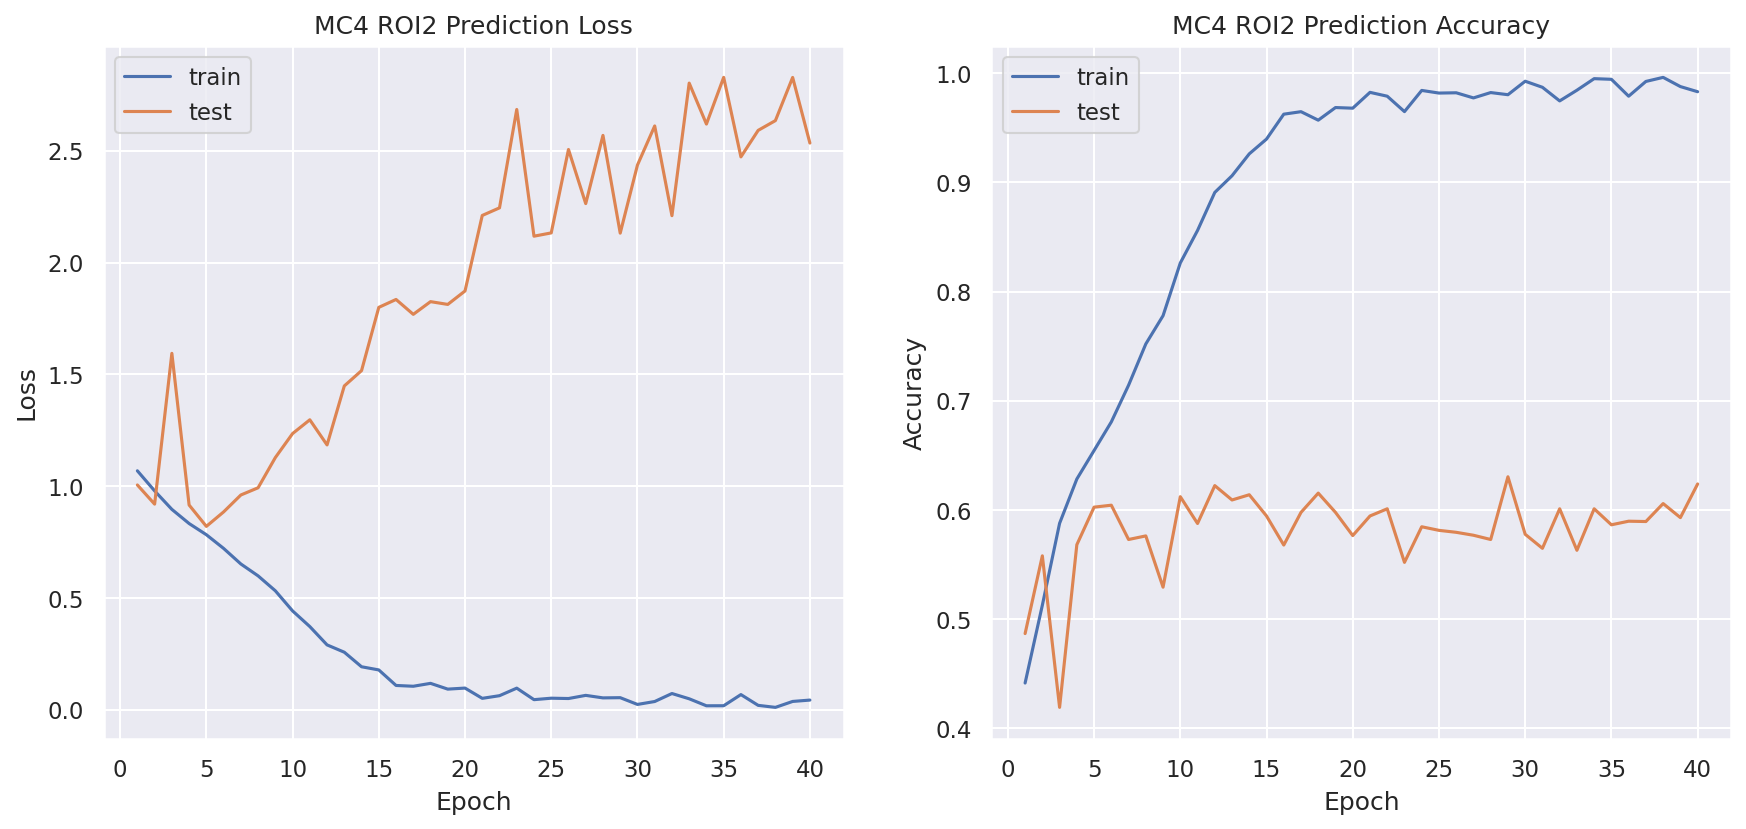

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'MC4 ROI2 Prediction')

**Metrics:**

In [18]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
result_path = str(base/'MC4_ROI2_prediction')

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

checkpoint = torch.load(result_path+'/best_model.pth')
model = MC4(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.6287625418060201
Precision: 0.633882666928644
Recall: 0.6283453732370141


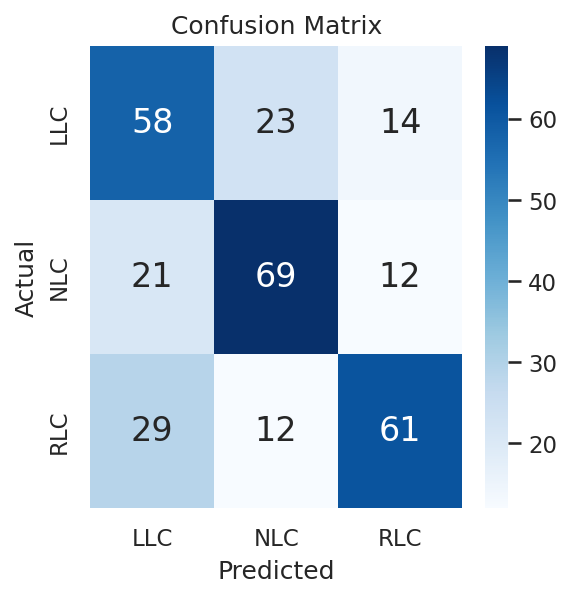

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

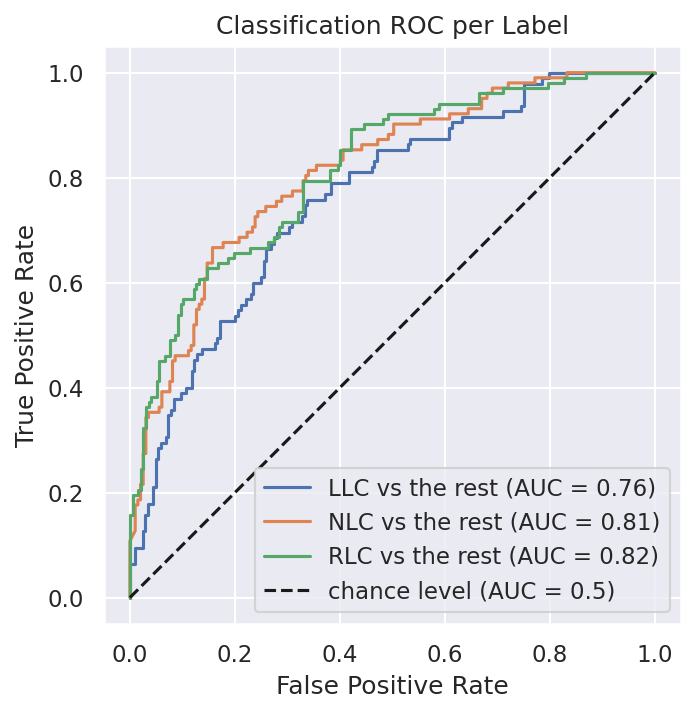

In [19]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()